<a href="https://colab.research.google.com/github/Harishkmr33/Capstone-Project-4/blob/main/Zomato_Clustering_%26_Sentiment_Analysis_Capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1** - Aman Sharma
##### **Team Member 2** - Mattaparty Harish

# **Project Summary -**

### Company's Introduction

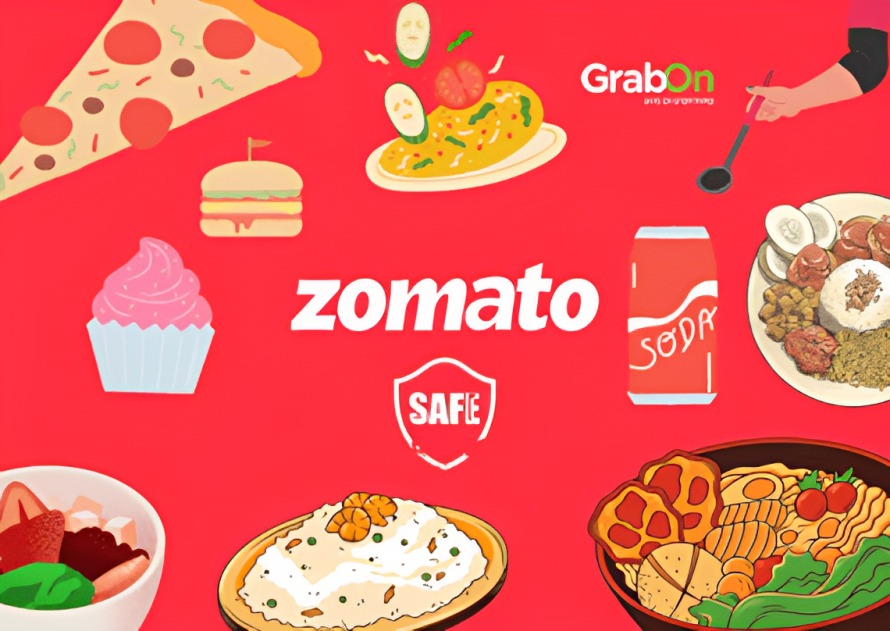

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city.

### Project Overview

* This project focuses on analyzing the Zomato restaurant data for Hyderabad city in 
India to gain insights and provide useful conclusions for both customers and the company. The project involves sentiment analysis of customer reviews and clustering of restaurants into different segments. By visualizing the data, it becomes easier to analyze and draw instant insights.

* The project begins by procuring data from Zomato, including information such as restaurant names, cuisines, average cost for two, ratings, and user reviews. The data is then cleaned and preprocessed, which involves eliminating duplicate entries, addressing missing values, and transforming the data into an analyzable format.

* clustering is implemented using the k-means algorithm to group similar restaurants together and identify patterns in the data. The features used for clustering include cuisines,Number of cuisines, and average cost for two. The number of clusters is determined using the Elbow method and Silhouette method.

* Sentiment analysis is then conducted on user reviews with the help of VADER using Sentiment Intensity Analyzer to understand the overall sentiment towards the restaurants. The reviews are classified as positive, negative, or neutral using appropriate libraries. Additionally, the most impactful words in the reviews are extracted through the application of Latent Dirichlet Allocation and visualized through word clouds.

* The analysis reveals that the restaurants in the city are grouped into two clusters based on their Cuisines, Number of cuisines, and Average cost for two. The sentiment analysis indicates that customers generally hold a positive sentiment towards the restaurants.

**Libraries used in EDA & Machine Learning:**
1. Pandas
2. Numpy
3. Matplotib
4. Seaborn
5. Plotly
6. Sklearn
7. Scipy
8. NLTK
9. Regex 
10. Gensim
11. PyLDAvis


**Graphs used for representation:**
1. Bar plot
2. Pie plot
3. Box Plot
4. Point plot
5. Tree Map
6. Heatmap
7. Pair plot
8. Word Cloud
9. Violin plot
10. Scatter plot



**ML Models used for training & testing:**
1. KMEANS CLUSTERING
2. AGGLOMERATIVE CLUSTERING
3. LATENT DRICLET ALLOCATION
4. VADER


> In conclusion, this project demonstrates the effectiveness of clustering and sentiment analysis in gaining a deeper understanding of Zomato restaurant data. The insights derived from the analysis can greatly benefit both restaurants and customers in making informed decisions. The project can be extended to other cities or countries to gain insights into eating habits and preferences in different regions.

# **GitHub Link -**

Mattaparty Harish - https://github.com/Harishkmr33/Capstone-Project-4

# **Problem Statement**


The aim of this machine learning project is to analyze customer sentiments expressed in reviews and provide valuable conclusions through visualizations. Additionally, the project involves clustering Zomato restaurants into different segments. By leveraging this analysis, the project aims to address several business cases, including assisting customers in finding the best restaurants in their locality and identifying areas where the company can improve and grow. The project utilizes valuable data on cuisine and costing for cost vs. benefit analysis and employs sentiment analysis to assess customer feedback. Furthermore, the metadata of reviewers will be used to identify influential critics in the industry.

# ***Let's Begin !***

## ***1. Know Your Data***

### Installing Libraries

In [ ]:
# For plotting Treemap
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# For Expanding contractions
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.3 MB/s eta 0:00:00


In [ ]:
# Machine Learning Visualization Libary
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LDA Visualization Libary
!pip install pyLDAvis==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.2 MB/s eta 0:00:00


### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from collections import Counter

# For visualization purpose
import seaborn as sns
import plotly.express as x
import plotly.graph_objs as go
import squarify
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# For Hypothesis Testing
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

#For Visulization of metrics scores
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import scipy.cluster.hierarchy as sch

#Models from Scikit-Learn
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# For calculation linear relation
from scipy.stats import linregress

# Expand Contraction
import contractions

# For NLP
import re
import nltk
from nltk.corpus import stopwords

# For Normalizing Text
from nltk.stem.snowball import SnowballStemmer

# For LDA
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

# Model saving
import pickle

# For suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Configure matplotlib rcParams
plt.rcParams["axes.grid"] = False
%matplotlib inline

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Datasets Harish
restaurant_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 3/Capstone project 4/Zomato Restaurant names and Metadata.csv')

review_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 3/Capstone project 4/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
restaurant_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Total observation and feature for restaurant: {restaurant_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


### Dataset Information

In [ ]:
# Checking info for restaurant_df
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# Checking info for review_df
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Duplicate values in Restaurant_df :' +"\n\n"+ f'{restaurant_df[restaurant_df.duplicated()].count()}\n')
print('='*40)
print(f'\nDuplicate values in Reviews_df :' + "\n\n"+ f'{review_df[review_df.duplicated()].count()}')

Duplicate values in Restaurant_df :

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64


Duplicate values in Reviews_df :

Restaurant    36
Reviewer       0
Review         0
Rating         0
Metadata       0
Time           0
Pictures      36
dtype: int64


In [ ]:
# Checking Duplicate values
review_df[review_df.duplicated()].head()

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0

In [ ]:
# Duplicacy in no. of resturants
review_df[review_df.duplicated()]['Restaurant'].value_counts()

American Wild Wings    22
Arena Eleven           14
Name: Restaurant, dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f'Null values in Restaurant_df : \n\n{restaurant_df.isna().sum()}\n')
print('='*40)
print(f'\nNull values in Reviews_df : \n\n{review_df.isna().sum()}')

Null values in Restaurant_df : 

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


Null values in Reviews_df : 

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


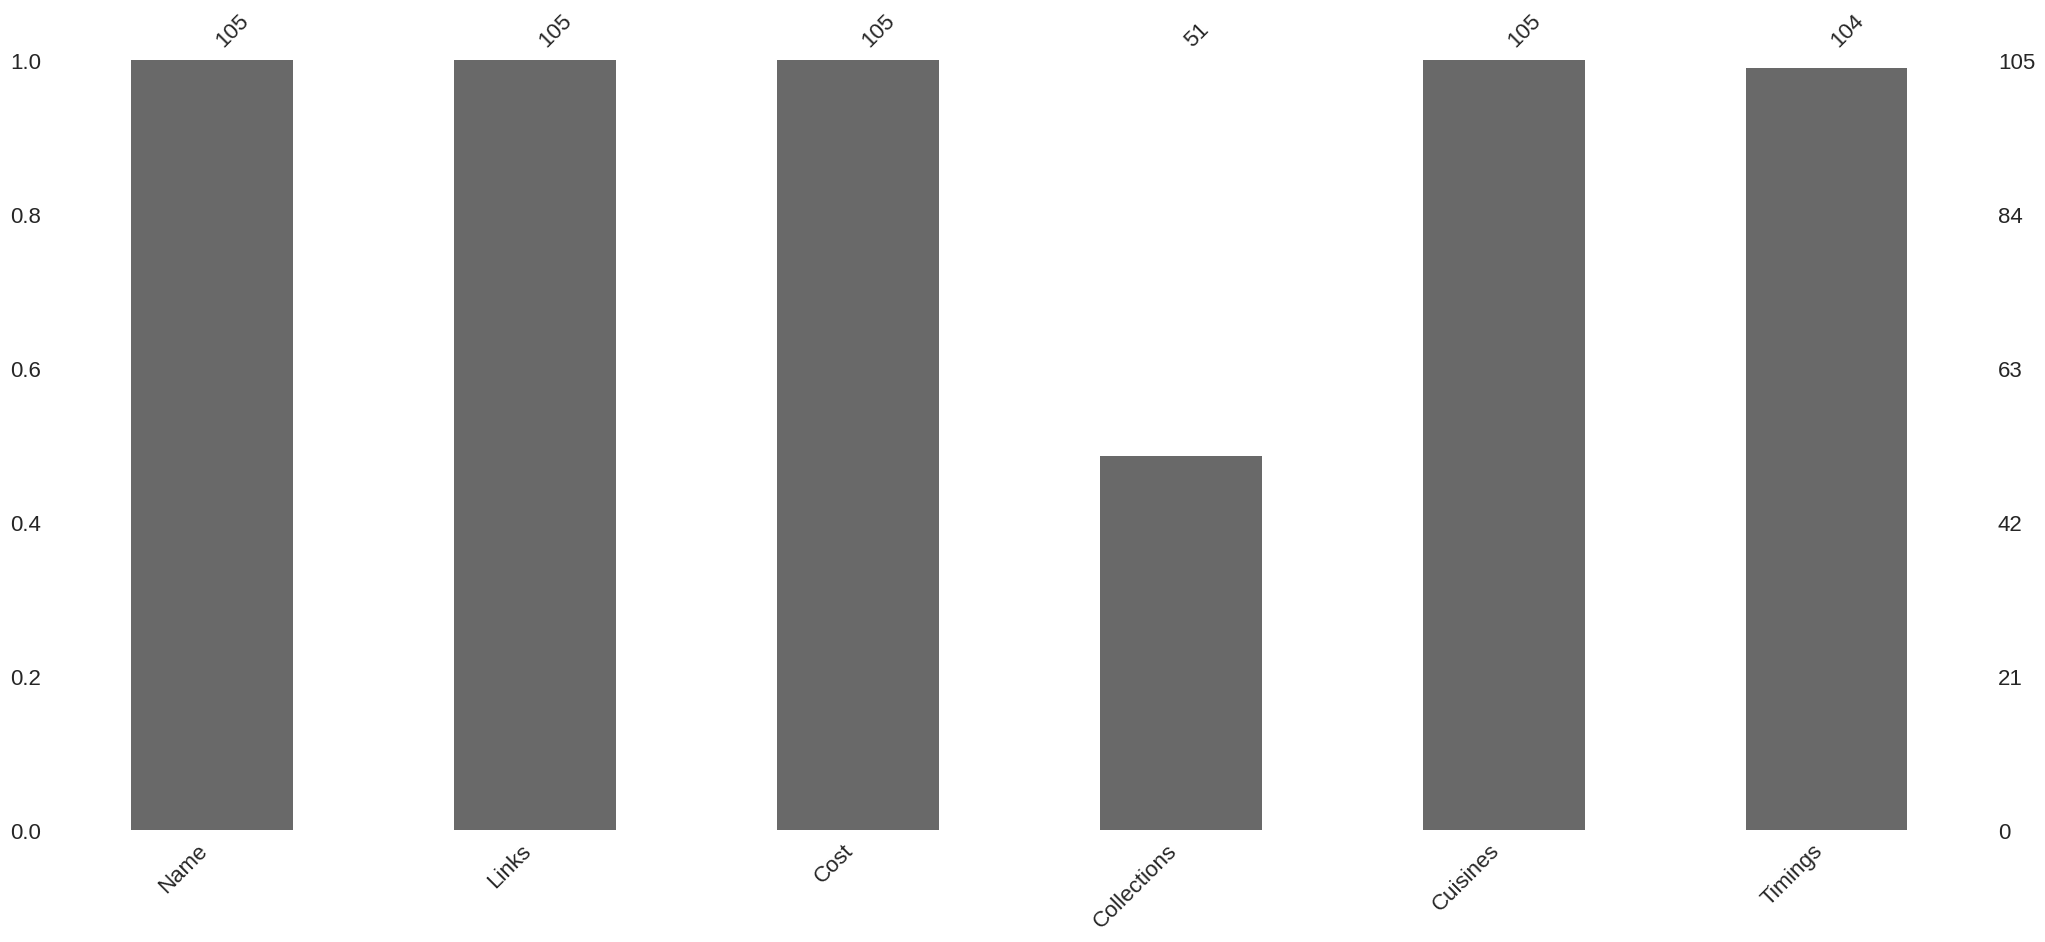

In [ ]:
# Visualizing the missing values for Restaurant_df
import missingno as msno
msno.bar(restaurant_df)
plt.show()

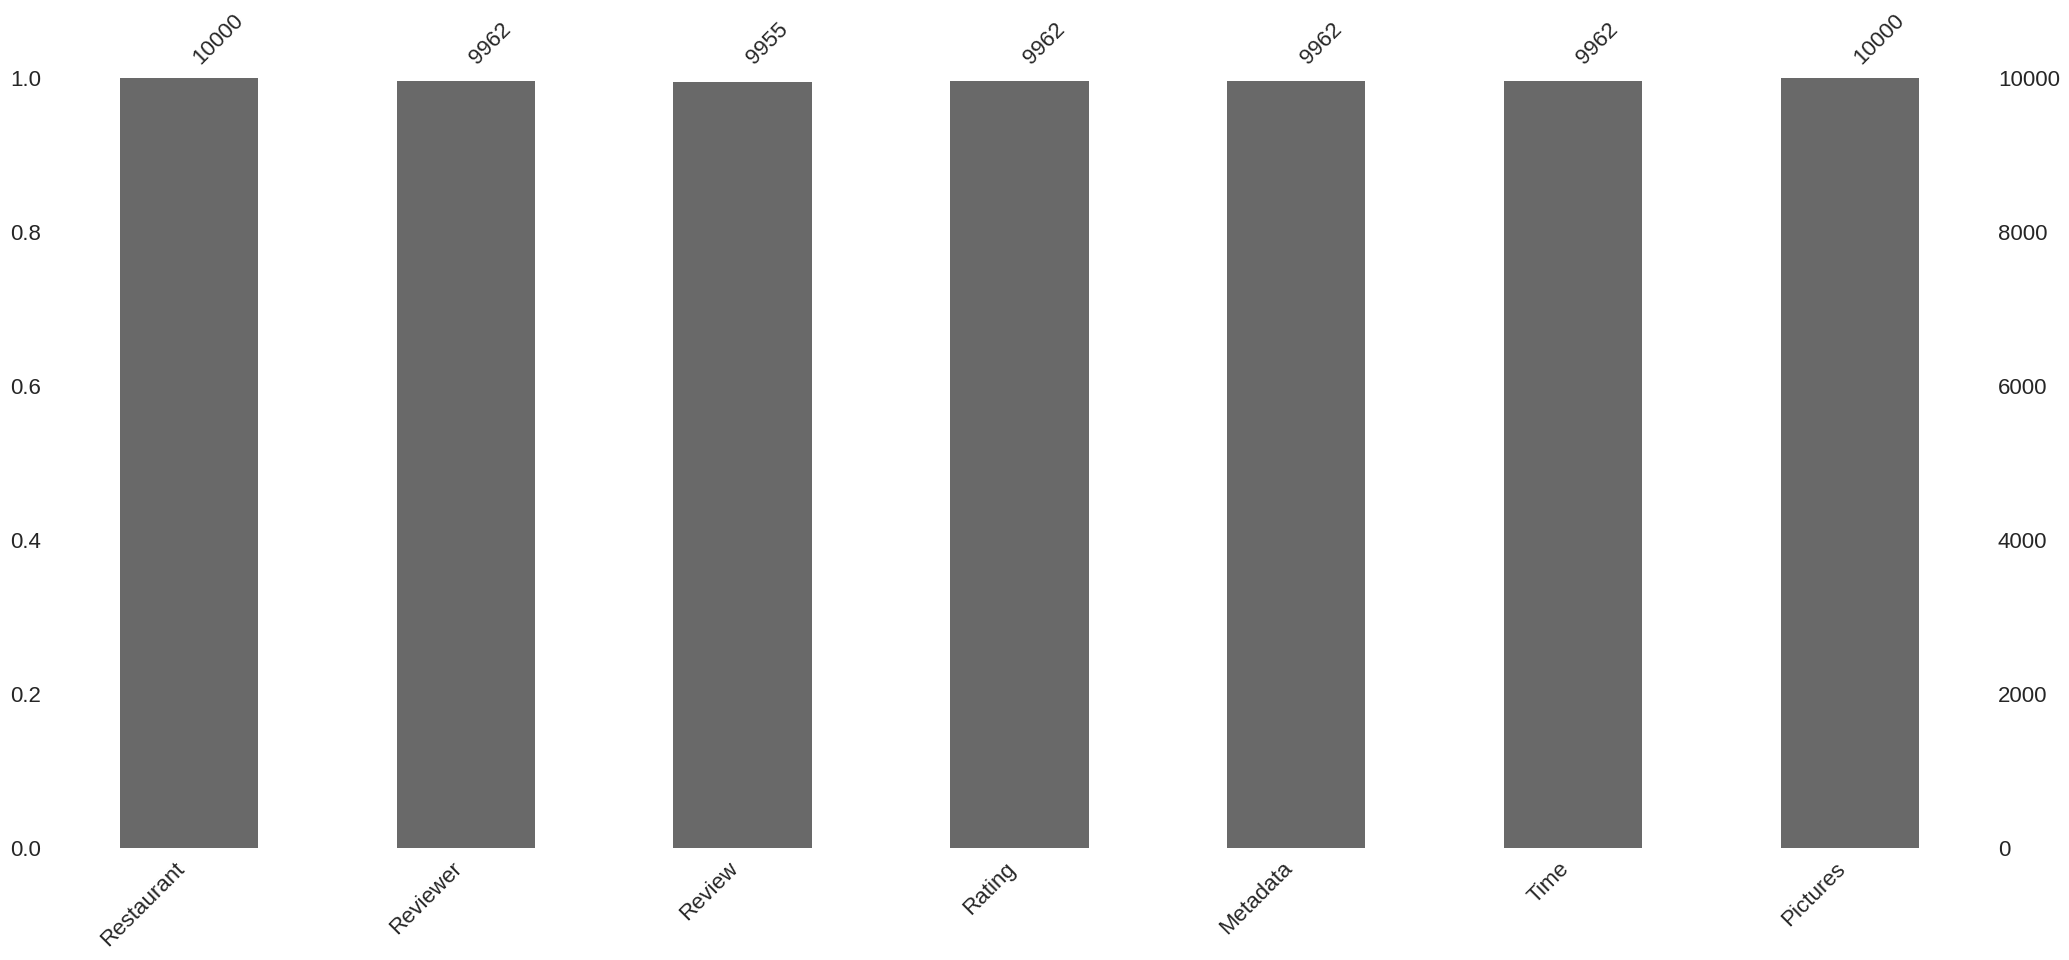

In [ ]:
# Visualizing the missing values for Restaurant_df
msno.bar(review_df)
plt.show()

### What did you know about your dataset?

> ***Restaurant Dataset***

* There are 105 total observation with 6 different features.
* Feature collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.



> ***Review Dataset***

* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but it is in object datatype, which should be converted into date time.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Features in Restaurant_df : {list(restaurant_df.columns)}\n')
print(f'Features in Reviews_df : {list(review_df.columns)}')

Features in Restaurant_df : ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Features in Reviews_df : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
# Dataset Describe for Restaurant_df
restaurant_df.describe().T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [ ]:
# Dataset Describe for Reviews_df
review_df.describe(include = 'all').T

count unique              top  freq    mean       std  min  25%  \
Restaurant    10000    100  Beyond Flavours   100     NaN       NaN  NaN  NaN   
Reviewer       9962   7446      Parijat Ray    13     NaN       NaN  NaN  NaN   
Review         9955   9364             good   237     NaN       NaN  NaN  NaN   
Rating         9962     10                5  3832     NaN       NaN  NaN  NaN   
Metadata       9962   2477         1 Review   919     NaN       NaN  NaN  NaN   
Time           9962   9782  7/29/2018 20:34     3     NaN       NaN  NaN  NaN   
Pictures    10000.0    NaN              NaN   NaN  0.7486  2.570381  0.0  0.0   

            50%  75%   max  
Restaurant  NaN  NaN   NaN  
Reviewer    NaN  NaN   NaN  
Review      NaN  NaN   NaN  
Rating      NaN  NaN   NaN  
Metadata    NaN  NaN   NaN  
Time        NaN  NaN   NaN  
Pictures    0.0  0.0  64.0

### Variables Description 

> **Zomato Restaurants Dataset**

* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

> **Zomato Restaurant Reviews Dataset**

* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable in Restaurant_df.

for i in restaurant_df.columns:
  print(f"Unique {i}'s count:{restaurant_df[i].nunique()}\n-------------------------------")

Unique Name's count:105
-------------------------------
Unique Links's count:105
-------------------------------
Unique Cost's count:29
-------------------------------
Unique Collections's count:42
-------------------------------
Unique Cuisines's count:92
-------------------------------
Unique Timings's count:77
-------------------------------


In [ ]:
# Check Unique Values for each variable in Review_df.

for i in review_df.columns:
  print(f"Unique {i}'s count:{review_df[i].nunique()}\n-------------------------------")

Unique Restaurant's count:100
-------------------------------
Unique Reviewer's count:7446
-------------------------------
Unique Review's count:9364
-------------------------------
Unique Rating's count:10
-------------------------------
Unique Metadata's count:2477
-------------------------------
Unique Time's count:9782
-------------------------------
Unique Pictures's count:36
-------------------------------


## 3. ***Data Wrangling***

###*Data Wrangling Code for restaurant_df*

In [ ]:
# Creating a copy for data wrangling from restaurant_df
rest_df = restaurant_df.copy()

In [ ]:
# Filling the missing value in 'Timings' variable with Mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0], inplace = True)

In [ ]:
# Converting variable 'Cost' into interger
rest_df['Cost'] = rest_df.Cost.str.replace(',', '').astype(int)

In [ ]:
# Checking number of restaurants based on cost
cost_df = rest_df['Cost'].value_counts().reset_index().rename(columns = {'index':'cost','Cost':'restaurant count'})
cost_df.head()

cost  restaurant count
0   500                13
1   600                10
2   700                 8
3  1200                 7
4   400                 6

In [ ]:
# Categorizing restaurants based on the cost
def restaurant_type(X):
  '''This function will divide restaurant into 4 types based on the Cost'''

  if X <= 500 :
    return 'Economical'
  elif 500 < X <= 1000:
    return 'Mid-scale'
  elif 1000 < X <= 1500:
    return 'Up-scale'
  else:
    return 'Fine-Dining'

# Applying the above funtion on the dataset
rest_df['restaurant type'] = rest_df.Cost.apply(lambda x: restaurant_type(x))

In [ ]:
# Checking number of restaurants based on its type
restaurant_by_type = rest_df['restaurant type'].value_counts().reset_index().rename(columns = {'index': 'Restaurant_type','restaurant type':'Restaurant_count'})
restaurant_by_type

Restaurant_type  Restaurant_count
0       Mid-scale                40
1      Economical                33
2        Up-scale                21
3     Fine-Dining                11

In [ ]:
# Adding a feature named num_of_cuisines for count the cuisines served in each resturant
rest_df['num_of_cuisines'] = rest_df['Cuisines'].apply(lambda x : len(x.split(",")))
rest_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings restaurant type  \
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Mid-scale   
1                                     11 AM to 11 PM       Mid-scale   
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM        Up-scale   
3                                    12 Noon to 2 AM       Mid-scale   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...        Up-scale   

   num_of_cuisines  
0                6  
1                3  
2                4  
3                5  
4                5

In [ ]:
# Function for counting words in the column
def count_items(col):
  '''This function returns count of unique categories present in the feature'''

  feature_list = col.apply(lambda x: x.split(",")).to_list()

  feature_list = [[item.strip() for item in sublist] for sublist in feature_list]

  dictonary = dict(Counter(j for i in feature_list for j in i))

  return pd.Series(dictonary).reset_index()

In [ ]:
# Checking cuisines available at different restaurants
cuisines_df = count_items(rest_df['Cuisines']).rename(columns = {'index':'cuisines',0:'Num_of_restaurants'}).sort_values(
                                                                 by = 'Num_of_restaurants',ascending = False,ignore_index = True)
cuisines_df.head()

cuisines  Num_of_restaurants
0  North Indian                  61
1       Chinese                  43
2   Continental                  21
3       Biryani                  16
4     Fast Food                  15

In [ ]:
# Replacing NaN values in Collections varible by empty string
rest_df.Collections.fillna(' ',inplace = True)

# Checking collections available at different restaurants
collections_df = count_items(rest_df['Collections']).rename(columns = {"index": "collections category",0:'Num_of_restaurants'}).sort_values(
                                                                 by = 'Num_of_restaurants',ascending = False,ignore_index = True)
collections_df.head(10)

collections category  Num_of_restaurants
0                                                               54
1                                Great Buffets                  11
2  Food Hygiene Rated Restaurants in Hyderabad                   8
3                       Live Sports Screenings                   7
4                          Hyderabad's Hottest                   7
5                          Corporate Favorites                   6
6                                    Top-Rated                   5
7                                 Gold Curated                   5
8                           Trending This Week                   5
9                              Veggie Friendly                   4

###*Data Wrangling for review_df*

In [ ]:
# Creating a copy for data wrangling from review_df
rev_df = review_df.copy()

In [ ]:
# Checking unique values of ratings given
print(rev_df["Rating"].unique())

['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]


In [ ]:
# Checking the review where rating is given as 'Like'
list(rev_df[rev_df["Rating"]=='Like']['Review'])

['One of the best pizzas to try. It served with the fresh crust and the topping of veggies are fresh and the taste of the ingredients was awesome and it is fully overloaded with Cheese. I would like to recommend to try every Time I wager for pizza']

In [ ]:
# Replacing the rating 'Like' to 5 based on the sentiment of the review
rev_df["Rating"] = rev_df["Rating"].replace('Like', '5')

In [ ]:
# Checking how many resturants are not reviewed by anyone
print(rev_df[rev_df["Reviewer"].isna()])

               Restaurant Reviewer Review Rating Metadata Time  Pictures
8777  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN   

In [ ]:
# Removing all the rows which are not reviewed by anyone
rev_df = rev_df[~rev_df["Reviewer"].isna()]

# Checking remaining null values after the treatment
rev_df[rev_df['Review'].isna()]

Restaurant                Reviewer Review Rating  \
2360                Amul        Lakshmi Narayana    NaN      5   
5799        Being Hungry                   Surya    NaN      5   
6449     Hyderabad Chefs          Madhurimanne97    NaN      5   
6489     Hyderabad Chefs                  Harsha    NaN      5   
7954        Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN      3   
8228  Al Saba Restaurant                  Suresh    NaN      5   
8844      Domino's Pizza             Sayan Gupta    NaN      5   

                     Metadata             Time  Pictures  
2360                0 Reviews  7/29/2018 18:00         0  
5799  4 Reviews , 4 Followers  7/19/2018 23:55         0  
6449                 1 Review  7/23/2018 16:29         0  
6489                 1 Review   7/8/2018 21:19         0  
7954    1 Review , 1 Follower   8/9/2018 23:25         0  
8228                 1 Review  7/20/2018 22:42         0  
8844  2 Reviews , 2 Followers   8/9/2018 21:41         0

In [ ]:
# Replacing NaN values with 'good' (which is also mode value) based on the reviews given
rev_df['Review'].fillna(rev_df['Review'].mode()[0], inplace = True)

In [ ]:
# Converting Object type variable into a datetime object
rev_df['Time'] = pd.to_datetime(rev_df['Time'],format="%m/%d/%Y %H:%M")

# Create three new columns named year, month, day from Time
rev_df['year']= rev_df['Time'].dt.year
rev_df['month']= rev_df['Time'].dt.month_name()
rev_df['day']= rev_df['Time'].dt.day_name()
# rev_df['hour'] = rev_df['Time'].dt.hour

In [ ]:
# Checking Dataset timeline
print(rev_df['Time'].min())
print(rev_df['Time'].max())

2016-05-31 16:41:00
2019-05-25 20:23:00


In [ ]:
# Convert Rating feature into float datatype
rev_df['Rating'] = rev_df['Rating'].astype(float)

In [ ]:
# Funtion for counting the number of followers of the reviewer
def count_follower(x):
  ''' This function will take metadata variable and returns Num of followers as int'''
  ls = x.split(" ")
  if len(ls) > 3:
    return int(ls[3])
  else:
    return 0

# Funtion for counting the number of reviews made by reviewer
def count_reviews(x):
  ''' This function will take metadata variable and returns Num of return reviews as int'''
  ls = x.split(" ")
  return int(ls[0])


In [ ]:
rev_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  year month       day  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  2019   May  Saturday  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  2019   May  Saturday  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  2019   May    Friday  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  2019   May    Friday  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0  2019   May    Friday

In [ ]:
# Creating a column for Num of followers of the reviewer
rev_df['followers'] = rev_df['Metadata'].apply(lambda x : count_follower(x))

# Creating a column for Num of reviews made by the reviewer
rev_df['reviews'] = rev_df['Metadata'].apply(lambda x : count_reviews(x))

# Aggregating the followers & num of reviews
Reviewer_count = rev_df.groupby('Reviewer').agg({'followers':'max','reviews':'max','Pictures':'sum'}).reset_index()

# Checking top 10 reviewers by followers
reviewers_by_follower = Reviewer_count[['Reviewer','followers','Pictures']].sort_values(by = 'followers',ascending = False, ignore_index = True)
reviewers_by_follower.head()

Reviewer  followers  Pictures
0    Satwinder Singh      13410        12
1         Eat_vth_me      13320        25
2       Samar Sardar      11329         6
3  Foodies Hyderabad       9494         3
4           Srinivas       7628         0

In [ ]:
# Checking top 10 reviewers by num of reviews
reviewers_by_reviews = Reviewer_count[['Reviewer','reviews']].sort_values(by = 'reviews',ascending = False, ignore_index = True)
reviewers_by_reviews.head()

Reviewer  reviews
0                           Anvesh Chowdary     1031
1                              ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ      685
2                                    Abc098      665
3                     Mithun Ravindranathan      560
4  Mohd Zubair Ali (Hyderabad.Food.Diaries)      482

In [ ]:
# Checking max pictures posted on which restuarants & thier average rating
popular_restaurant = rev_df.groupby('Restaurant').agg({'Pictures':'sum','Rating':'mean'}).reset_index().sort_values(by = 'Pictures',ascending = False,ignore_index = True)
popular_restaurant.head()

Restaurant  Pictures    Rating
0            PourHouse7       356  3.860000
1          Arena Eleven       280  4.117647
2  Marsala Food Company       276  3.460000
3     Hyderabadi Daawat       234  3.830000
4   American Wild Wings       218  3.974026

In [ ]:
# Number of reviews posted yearly
year_wise_review = rev_df['year'].value_counts().reset_index().rename(columns = {'index': 'year','year':'review count'})
year_wise_review['year'] = year_wise_review['year'].astype(str)
year_wise_review

year  review count
0  2018          4903
1  2019          4803
2  2017           213
3  2016            43

In [ ]:
# Number of reviews posted monthly
month_wise_review = rev_df['month'].value_counts().reset_index().rename(columns = {'index': 'month','month':'review count'})
month_wise_review

month  review count
0         May          1542
1        July          1331
2       April          1247
3       March          1065
4    February           719
5      August           677
6     January           652
7   September           645
8     October           629
9    December           594
10   November           569
11       June           292

In [ ]:
# Number of reviews posted on days of week
day_wise_review = rev_df['day'].value_counts().reset_index().rename(columns = {'index': 'day','day':'review count'})
day_wise_review

day  review count
0     Sunday          1827
1   Saturday          1737
2     Friday          1433
3  Wednesday          1282
4   Thursday          1246
5     Monday          1245
6    Tuesday          1192

In [ ]:
# Checking counts of rating provided
Rating_wise_review = rev_df['Rating'].value_counts().reset_index().rename(columns = {'index': 'Rating','Rating':'review count'})
Rating_wise_review

Rating  review count
0     5.0          3833
1     4.0          2373
2     1.0          1735
3     3.0          1193
4     2.0           684
5     4.5            69
6     3.5            47
7     2.5            19
8     1.5             9

In [ ]:
# Checking Restaurant with zero Reviews/Rating
print(f"Restaurant with zero reviews: {list(set(rest_df['Name']) - set(rev_df['Restaurant']))}")

Restaurant with zero reviews: ['Republic Of Noodles - Lemon Tree Hotel', 'Angaara Counts 3', 'Wich Please', 'IndiBlaze', 'Sweet Basket']


In [ ]:
# Merging both Restaurant & Review Dataset
merged_df = pd.merge(rest_df, rev_df, left_on = 'Name',right_on = 'Restaurant')

# Checking restuarants with highest average rating
top_restaurants_by_rating = merged_df.groupby(['Name','restaurant type','Cost','num_of_cuisines']).agg(
                                                                         {'Rating':'mean','Review':'count'}).reset_index().sort_values(
                                                                         by = 'Rating', ascending = False,ignore_index = True)
top_restaurants_by_rating.head()                                                                         

Name restaurant type  Cost  num_of_cuisines  \
0       AB's - Absolute Barbecues        Up-scale  1500                3   
1                          B-Dubs     Fine-Dining  1600                1   
2  3B's - Buddies, Bar & Barbecue        Up-scale  1100                3   
3                        Paradise       Mid-scale   800                3   
4                        Flechazo        Up-scale  1300                4   

   Rating  Review  
0    4.88     100  
1    4.81     100  
2    4.76     100  
3    4.70     100  
4    4.66     100

### What all manipulations have you done and insights you found?

> Restaurant Dataframe

* Variable 'Timing' has one missing which is replaced by mode.
* Variable 'Cost' was in object type which is converted into interger.
* Created a new variable 'restaurant_type' by dividing restaurants into 4 categories based on the cost:
                              > upto 500 - 'Economical'
                              > From 501 to 1000 - 'Mid-scale'
                              > From 1001 to 1500 - 'Up-scale'
                              > Above 1500 - 'Fine-Dining'


 * Created a new variable 'num_of_cuisines' by counting the cuisines offered by restaurant.
 * Replaced NaN values in 'Collections' variable by empty string.


 > Review Dataframe

 * Replaced the rating 'Like' to 5 based on the sentiment of the review.
 * Removed all the resturants which are not reviewed by anyone, which also removes the duplicate rows.
 * Replaced remaining NaN values in review with 'good' (which is also mode value) based on the ratings given.
 * Converted 'Time' variable from object to datetime datatype & found Reviews posted are in between 2016-05-31 to 2019-05-25.
 * Converted 'Rating' variable from object to float datatype.
 * Extracted three new variables named year, month, day from Time.
 * Creating a variable 'Num of followers' & 'Num of reviews' of the reviewer from metadata.
 * Five restaurants, namely 'Wich Please', 'Angaara Counts 3', 'IndiBlaze', 'Republic Of Noodles - Lemon Tree Hotel', and 'Sweet Basket', have zero reviews. This could indicate that these restaurants are relatively new or less popular among reviewers.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Creating a function for ploting bar graph
def Bar_plot(df,size,orientation):
    '''This function takes a dataframe as input & plots a bar plot'''

    plt.figure(figsize=size)

    if orientation == 'Horizontal':
      ax = sns.barplot(data=df,y = df.iloc[:,0],x= df.iloc[:,1])

    elif orientation == 'Vertical':
      ax = sns.barplot(data=df,x = df.iloc[:,0],y= df.iloc[:,1])
      
    plt.title(f"Distribution based on {df.columns[0]} and {df.columns[1]}")
    plt.show()

In [ ]:
# Creating a function for ploting word cloud
def draw_word_cloud(dataframe,title):
    '''This function takes a dataframe as input & plots word_cloud'''

    # Create a dictionary of values and their frequencies
    word_freq = dict(zip(dataframe.iloc[:,0], dataframe.iloc[:,1]))

    # Create the word cloud using the frequencies
    wordcloud = WordCloud(width=800, height=400,colormap='rainbow', background_color='black').generate_from_frequencies(word_freq)

    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
# Function for plotting Treemap
def draw_tree_map(df,title):

    '''This function takes dataframe and title as input and draws a tree map'''
    cmap = plt.cm.viridis
    m=min(df.iloc[:,1])
    norm = plt.Normalize(m)
    colors = [cmap(norm(value)) for value in df.iloc[:,1]]
    labels = df.iloc[:,0] + '\n' + df.iloc[:,1].astype(str)
    squarify.plot(sizes=df.iloc[:,1], label=labels, alpha=.8, color=colors)
    plt.title(title)
    plt.axis('off')

#### Chart - 1

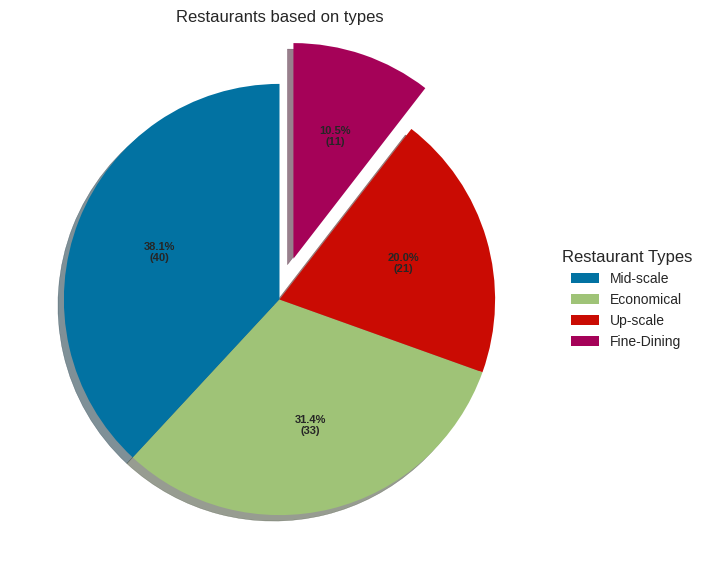

In [ ]:
# Chart - 1 -> Restaurants based on types

# Creating variables
restaurant_types = restaurant_by_type.iloc[:, 0].values
restaurant_counts = restaurant_by_type.iloc[:, 1].values

# Creating explode data
explode = (0.0, 0.0, 0.0, 0.2)

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(restaurant_counts,
                                  autopct=lambda pct: func(pct, restaurant_counts),
                                  explode=explode,
                                  shadow=True,
                                  startangle=90)

# Adding legend
ax.legend(wedges, restaurant_types,
          title="Restaurant Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Restaurants based on types")

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

> The pie chart is visually striking and easy to understand.
The pie chart gives us an idea of the relative proportion for each category of data at a single glance, permit a visual check of the reasonableness or accuracy of calculations.

##### 2. What is/are the insight(s) found from the chart?



> The majority of restaurants (38.1%) fall under the mid-scale category, followed by affordable restaurants (31.4%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Restaurants having cost upto 1000rs caputure around 70% of market share, this indicates that customers have a preference for restaurants that offer moderate pricing options.

#### Chart - 2

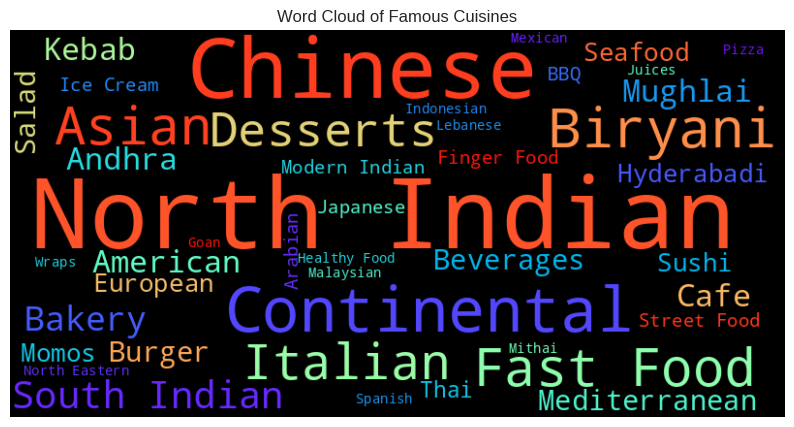

In [ ]:
# Chart - 2 -> Word cloud of famous cuisines

draw_word_cloud(cuisines_df,'Word Cloud of Famous Cuisines')

##### 1. Why did you pick the specific chart?

> A word cloud is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

> North Indian is the most famous cuisine, which is availabe at 61 out of 105 restaurants.

#### Chart - 3

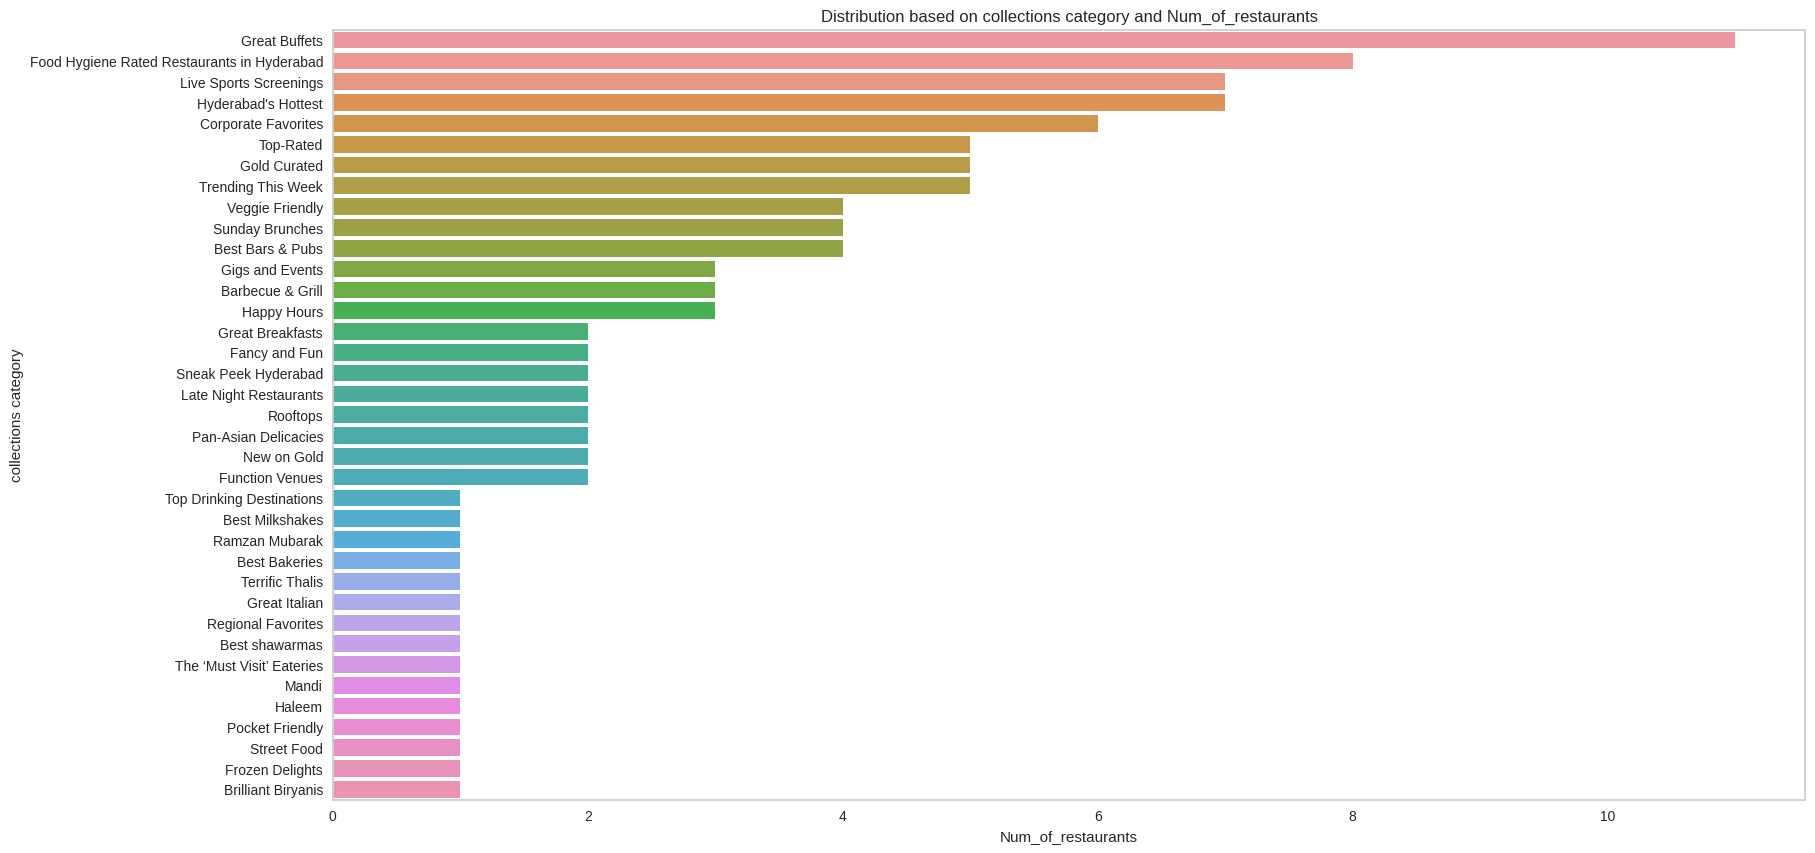

In [ ]:
# Chart - 3 -> Collection category available at number of restaurants

Bar_plot(collections_df.iloc[1:,:],size = (19,10),orientation = 'Horizontal')

##### 1. Why did you pick the specific chart?

> Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

> The tagline "Great Buffets" stands out as the most famous collection, suggesting that buffet-style dining is highly regarded among customers.

#### Chart - 4

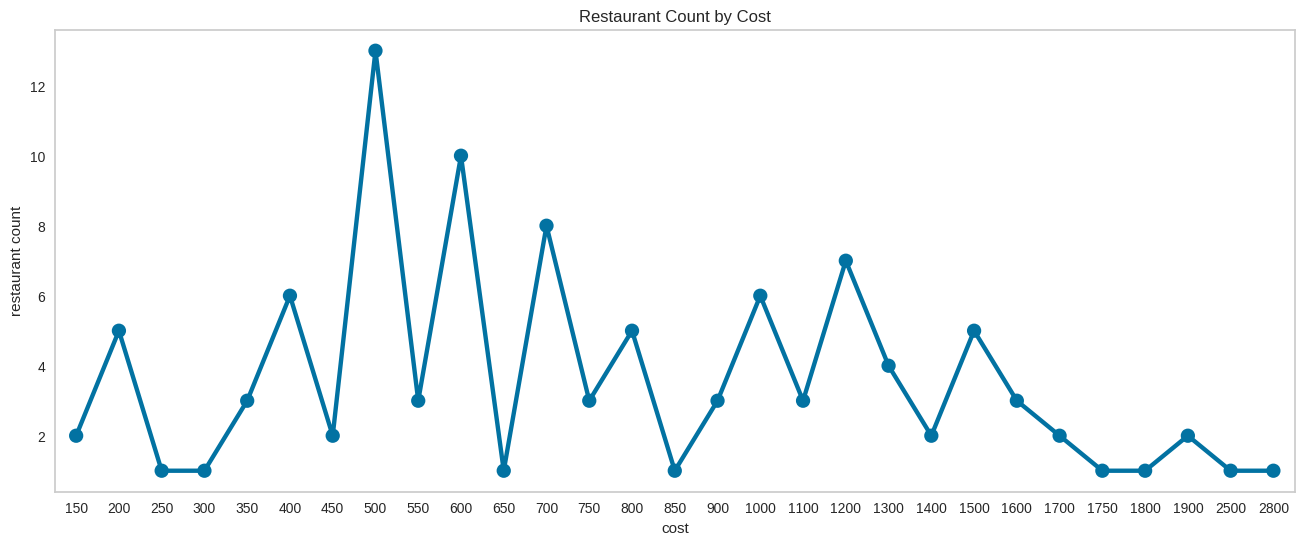

In [ ]:
# Chart - 4 -> Restaurant Count by Cost

plt.figure(figsize=(16, 6))
sns.pointplot(x='cost', y='restaurant count', data=cost_df)
plt.xlabel('cost')
plt.ylabel('restaurant count')
plt.title('Restaurant Count by Cost')
plt.show()

##### 1. Why did you pick the specific chart?

> A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

> The minimum restaurant price is 150, offered by Amul & Mohammedia Shawarma, while the maximum price is 2800, offered by Collage - Hyatt Hyderabad Gachibowli. This indicates a wide range of pricing options available to customers.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> 500rs cost is offered by most of the restaurants.

#### Chart - 5

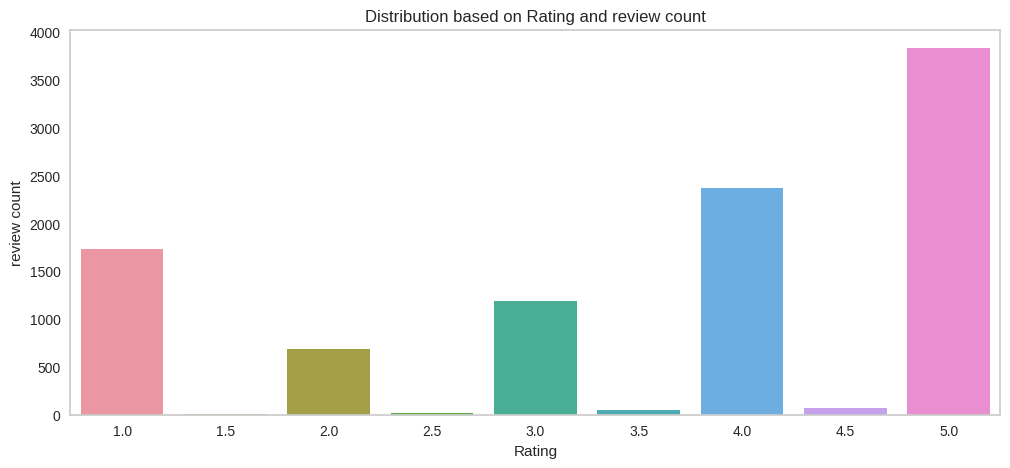

In [ ]:
# Chart - 5 -> Checking count of ratings given
Bar_plot(Rating_wise_review,size = (12,5),orientation = 'Vertical')

##### 1. Why did you pick the specific chart?

> Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

> Reviewers predominantly give ratings of 5 and 4, indicating positive sentiments towards the restaurants. This suggests that customers generally have a satisfactory dining experience.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

> 1 rating is not given by the reviewers unless the experience is very bad.

#### Chart - 6

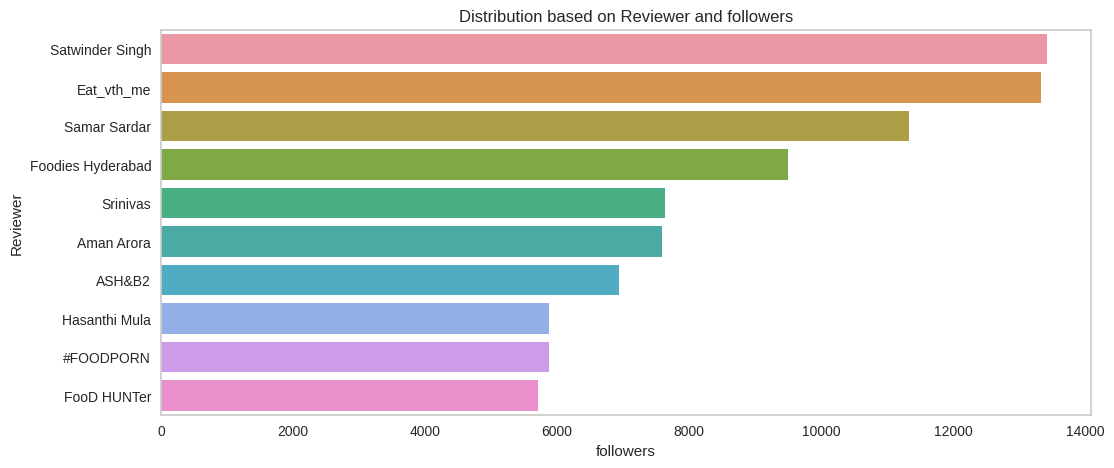

In [ ]:
# Chart - 6 -> Checking which reviewer has maximum followers
Bar_plot(reviewers_by_follower.head(10),size = (12,5),orientation = 'Horizontal')

##### 1. Why did you pick the specific chart?

> Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

> Satwinder Singh has the highest number of followers among all reviewers.

#### Chart - 7

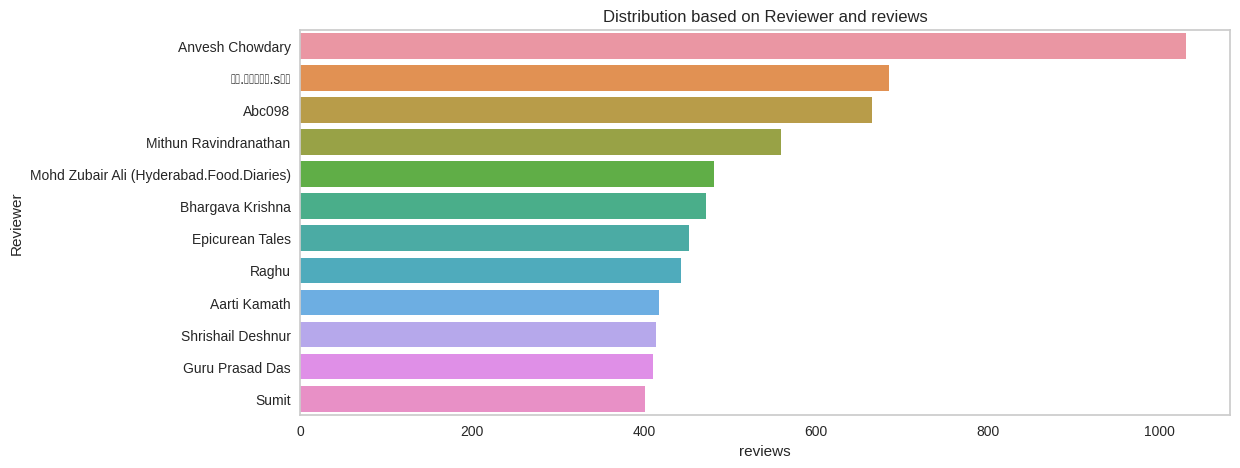

In [ ]:
# Chart - 7 -> Checking which reviewer posted maximum reviews
Bar_plot(reviewers_by_reviews.head(12),size = (12,5),orientation = 'Horizontal')

##### 1. Why did you pick the specific chart?

> Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

> Anvesh Chowdary has posted maximum number of reviews.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

> These insights can be useful for identifying influential reviewers and understanding their impact on the restaurant industry.

#### Chart - 8

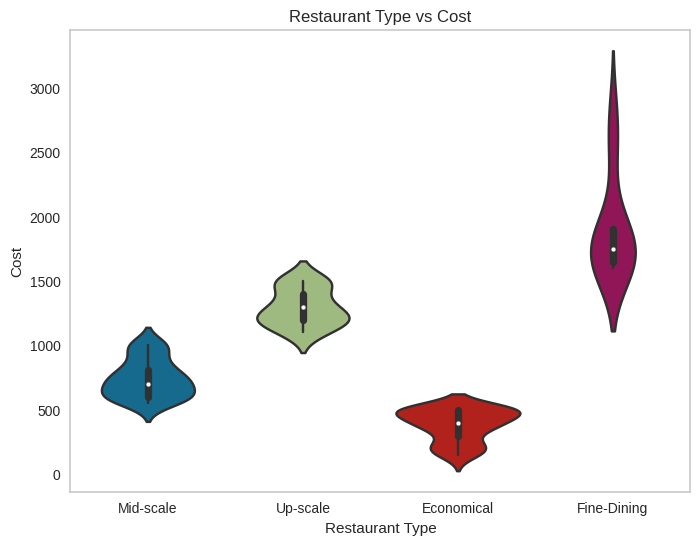

In [ ]:
# Chart - 10 -> Restaurant Type vs Cost

plt.figure(figsize=(8, 6))
sns.violinplot(x='restaurant type', y='Cost', data=rest_df)
plt.xlabel('Restaurant Type')
plt.ylabel('Cost')
plt.title('Restaurant Type vs Cost')
plt.show()

##### 1. Why did you pick the specific chart?

> A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?

> Shows the distribution of restaurant type according to the Cost range, Economical type is upto 500, Mid-Scale is between 501 to 1000, Up-Scale is between 1001 to 1500 & Fine-Dining is above 1500.

#### Chart - 9

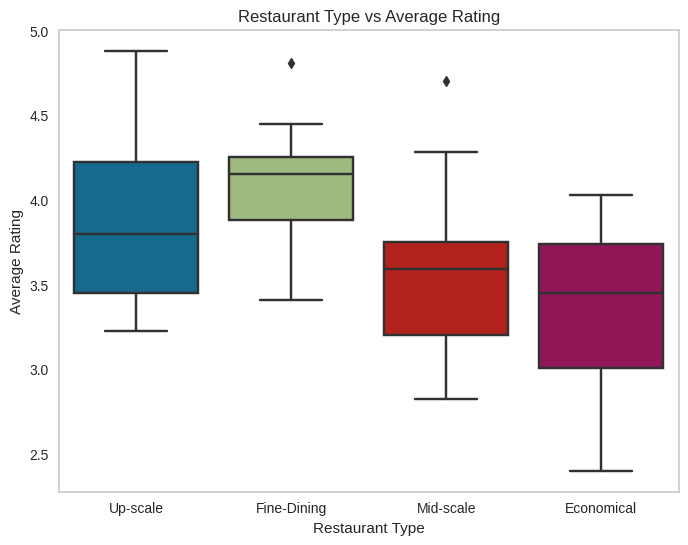

In [ ]:
# Chart - 8 -> Restaurant Type vs Average Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='restaurant type', y='Rating', data=top_restaurants_by_rating)
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.title('Restaurant Type vs Average Rating')
plt.show()

##### 1. Why did you pick the specific chart?

> Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

> High-priced restaurants tend to receive higher ratings, indicating that customers expect a better dining experience when paying more.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> There is scoop of improvement in Economical type restaurants.

#### Chart - 10

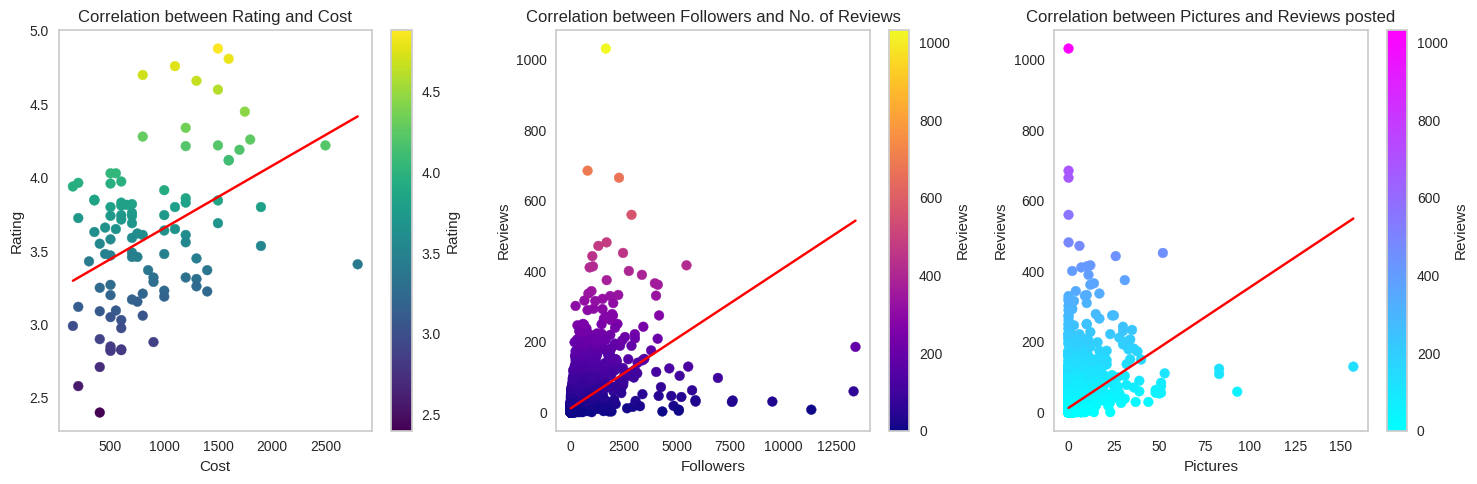

In [ ]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1 - Correlation between Rating and Cost
scatter1 = axes[0].scatter(top_restaurants_by_rating['Cost'], top_restaurants_by_rating['Rating'],
                           c=top_restaurants_by_rating['Rating'], cmap='viridis')
axes[0].set_xlabel('Cost')
axes[0].set_ylabel('Rating')
axes[0].set_title('Correlation between Rating and Cost')

# Calculate and plot the trendline
slope, intercept, _, _, _ = linregress(top_restaurants_by_rating['Cost'], top_restaurants_by_rating['Rating'])
x = np.linspace(top_restaurants_by_rating['Cost'].min(), top_restaurants_by_rating['Cost'].max(), 100)
axes[0].plot(x, intercept + slope * x, color='red')

# Plot 2 - Correlation between followers and reviews
scatter2 = axes[1].scatter(Reviewer_count['followers'], Reviewer_count['reviews'],
                           c=Reviewer_count['reviews'], cmap='plasma')
axes[1].set_xlabel('Followers')
axes[1].set_ylabel('Reviews')
axes[1].set_title('Correlation between Followers and No. of Reviews')

# Calculate and plot the trendline
slope, intercept, _, _, _ = linregress(Reviewer_count['followers'], Reviewer_count['reviews'])
x = np.linspace(Reviewer_count['followers'].min(), Reviewer_count['followers'].max(), 100)
axes[1].plot(x, intercept + slope * x, color='red')

# Plot 3 - Correlation between pictures and reviews posted
scatter3 = axes[2].scatter(Reviewer_count['Pictures'], Reviewer_count['reviews'],
                           c=Reviewer_count['reviews'], cmap='cool')
axes[2].set_xlabel('Pictures')
axes[2].set_ylabel('Reviews')
axes[2].set_title('Correlation between Pictures and Reviews posted')

# Calculate and plot the trendline
slope, intercept, _, _, _ = linregress(Reviewer_count['Pictures'], Reviewer_count['reviews'])
x = np.linspace(Reviewer_count['Pictures'].min(), Reviewer_count['Pictures'].max(), 100)
axes[2].plot(x, intercept + slope * x, color='red')

# Add colorbars
cbar1 = fig.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Rating')
cbar2 = fig.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Reviews')
cbar3 = fig.colorbar(scatter3, ax=axes[2])
cbar3.set_label('Reviews')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

> A scatter plot uses dots to represent values for two different numeric variables. Scatter plots are used to observe relationships between variables. A linear regression is a straight line representation of relationship between an independent and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

> Both Number of reviews & followers, Cost & Rating are positively correlated with each other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Negative review from Reviewers having more followers can have huge impact on the image of restaurant.

#### Chart - 11

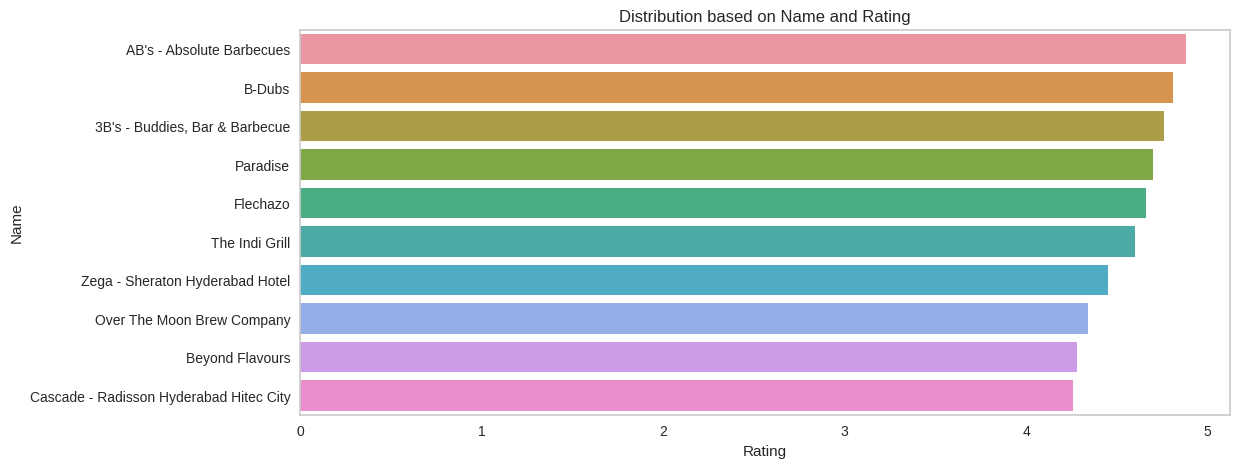

In [ ]:
# Chart - 11 -> Checking restaurants having highest average rating
Bar_plot(top_restaurants_by_rating.head(10)[['Name','Rating']],size = (12,5),orientation = 'Horizontal')

##### 1. Why did you pick the specific chart?

> Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

> The top-rated restaurants primarily fall under the up-scale and fine dining categories. This suggests that customers highly value quality and sophistication in their dining experiences.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Very few Mid-Scale restaurants fall under Top 10 rated, other restaurants in similar scale can provide such service for better customer experience.

#### Chart - 12

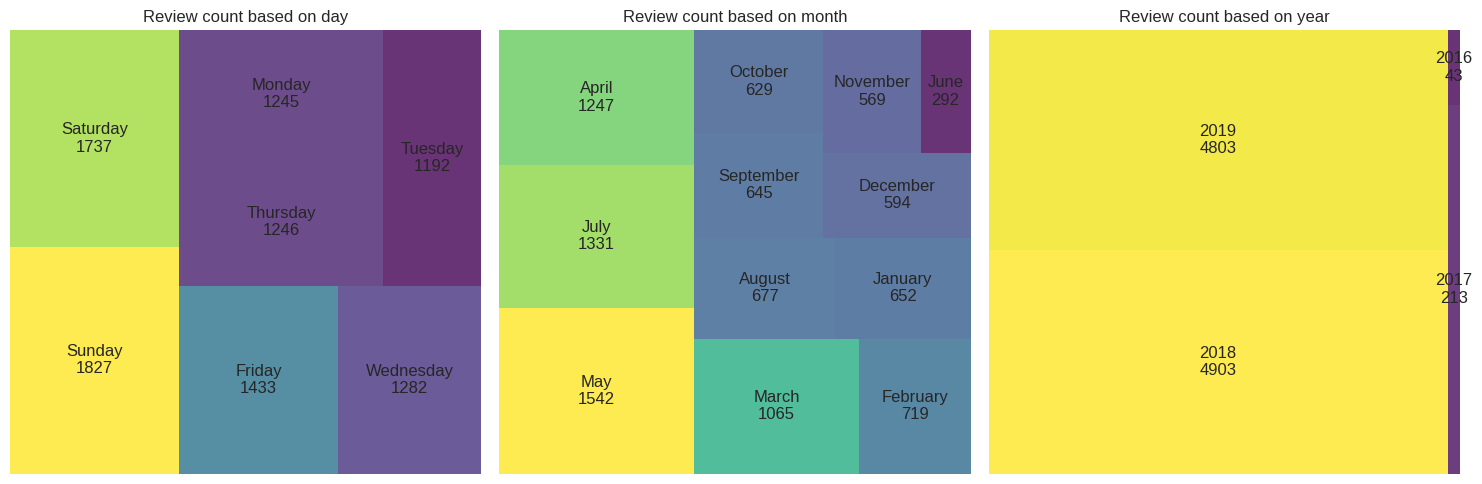

In [ ]:
# Chart - 12 -> Review count based on Day, Month & Year

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Draw the first treemap on the left subplot
plt.subplot(1, 3, 1)
draw_tree_map(day_wise_review,title = 'Review count based on day')

# Draw the second treemap on the right subplot
plt.subplot(1, 3, 2)
draw_tree_map(month_wise_review,title = 'Review count based on month')

# Draw the second treemap on the right subplot
plt.subplot(1, 3, 3)
draw_tree_map(year_wise_review,title = 'Review count based on year')

# Set title for the first subplot
axes[0].set_title('Review count based on day')

# Set title for the second subplot
axes[1].set_title('Review count based on month')

# Set title for the second subplot
axes[2].set_title('Review count based on year')

# Adjust the layout spacing
plt.tight_layout()

# Display the plots
plt.show()

##### 1. Why did you pick the specific chart?

> The treemap functions as a visualization composed of nested rectangles. These rectangles represent certain categories within a selected dimension and are ordered in a hierarchy, or “tree.”

##### 2. What is/are the insight(s) found from the chart?

> Reviews are predominantly posted on weekends, indicating that customers are more likely to dine out or order food during this time. There is also a significant increase in the number of reviews posted year on year, indicating a growing interest in the restaurant industry.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Customers are mostly free on weekends, so rolling out offers on these days can attract more people.

#### Chart - 13

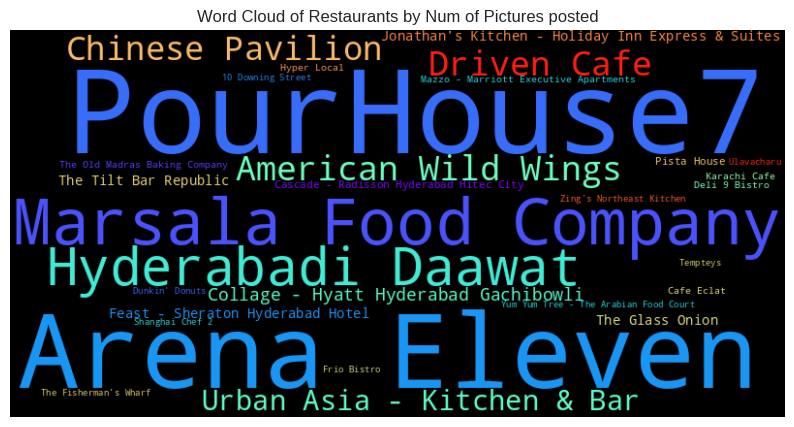

In [ ]:
# Chart - 13 -> Top 30 Restuarants based on pictures posted

draw_word_cloud(popular_restaurant.head(30),'Word Cloud of Restaurants by Num of Pictures posted')

##### 1. Why did you pick the specific chart?

> A word cloud is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

> Restaurants with the highest number of pictures posted tend to have average ratings below 4.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> This suggests that customers may have higher expectations based on visual representations but are less satisfied with the overall dining experience.

#### Chart - 14 - Correlation Heatmap

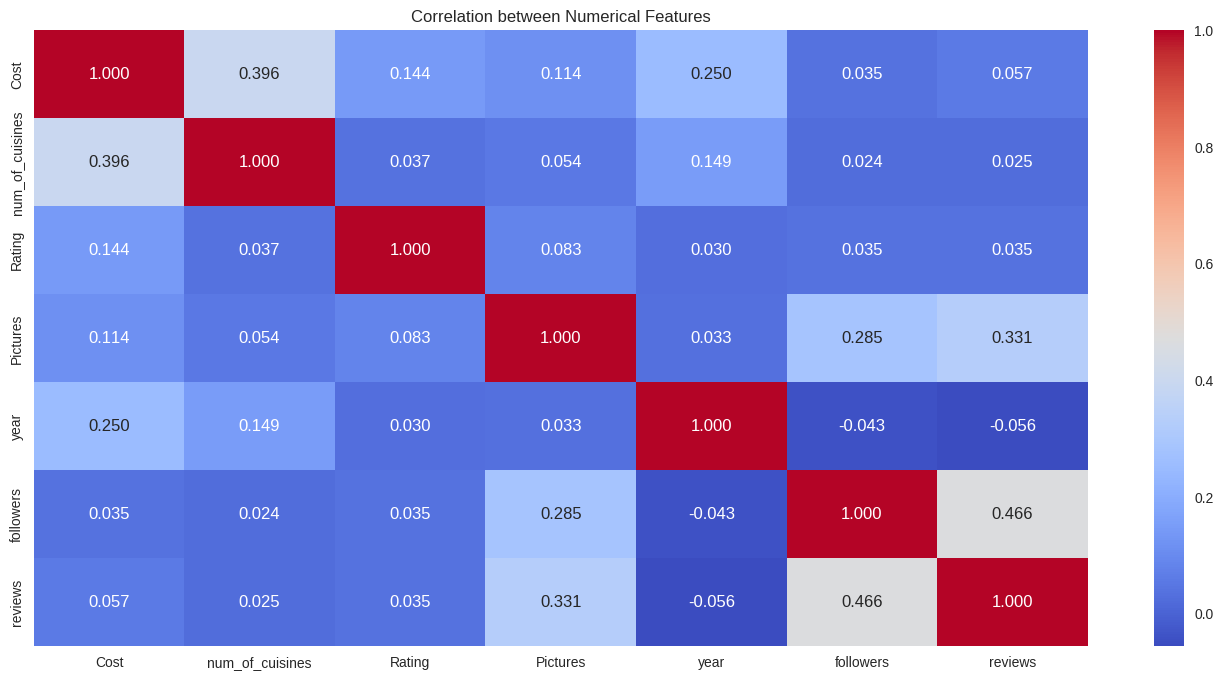

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation between Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

> Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.Since we want find relationship between diffrent variables in dataframe and heatmap can be one of the way to visualize it.

##### 2. What is/are the insight(s) found from the chart?

> The number of cuisines and cost are positively correlated, indicating that restaurants offering a greater variety of cuisines tend to have higher prices.

> Number of reviews, pictures posted & followers are positively correlated as well,suggesting that popular restaurants attract more attention and engagement.

#### Chart - 15 - Pair Plot 

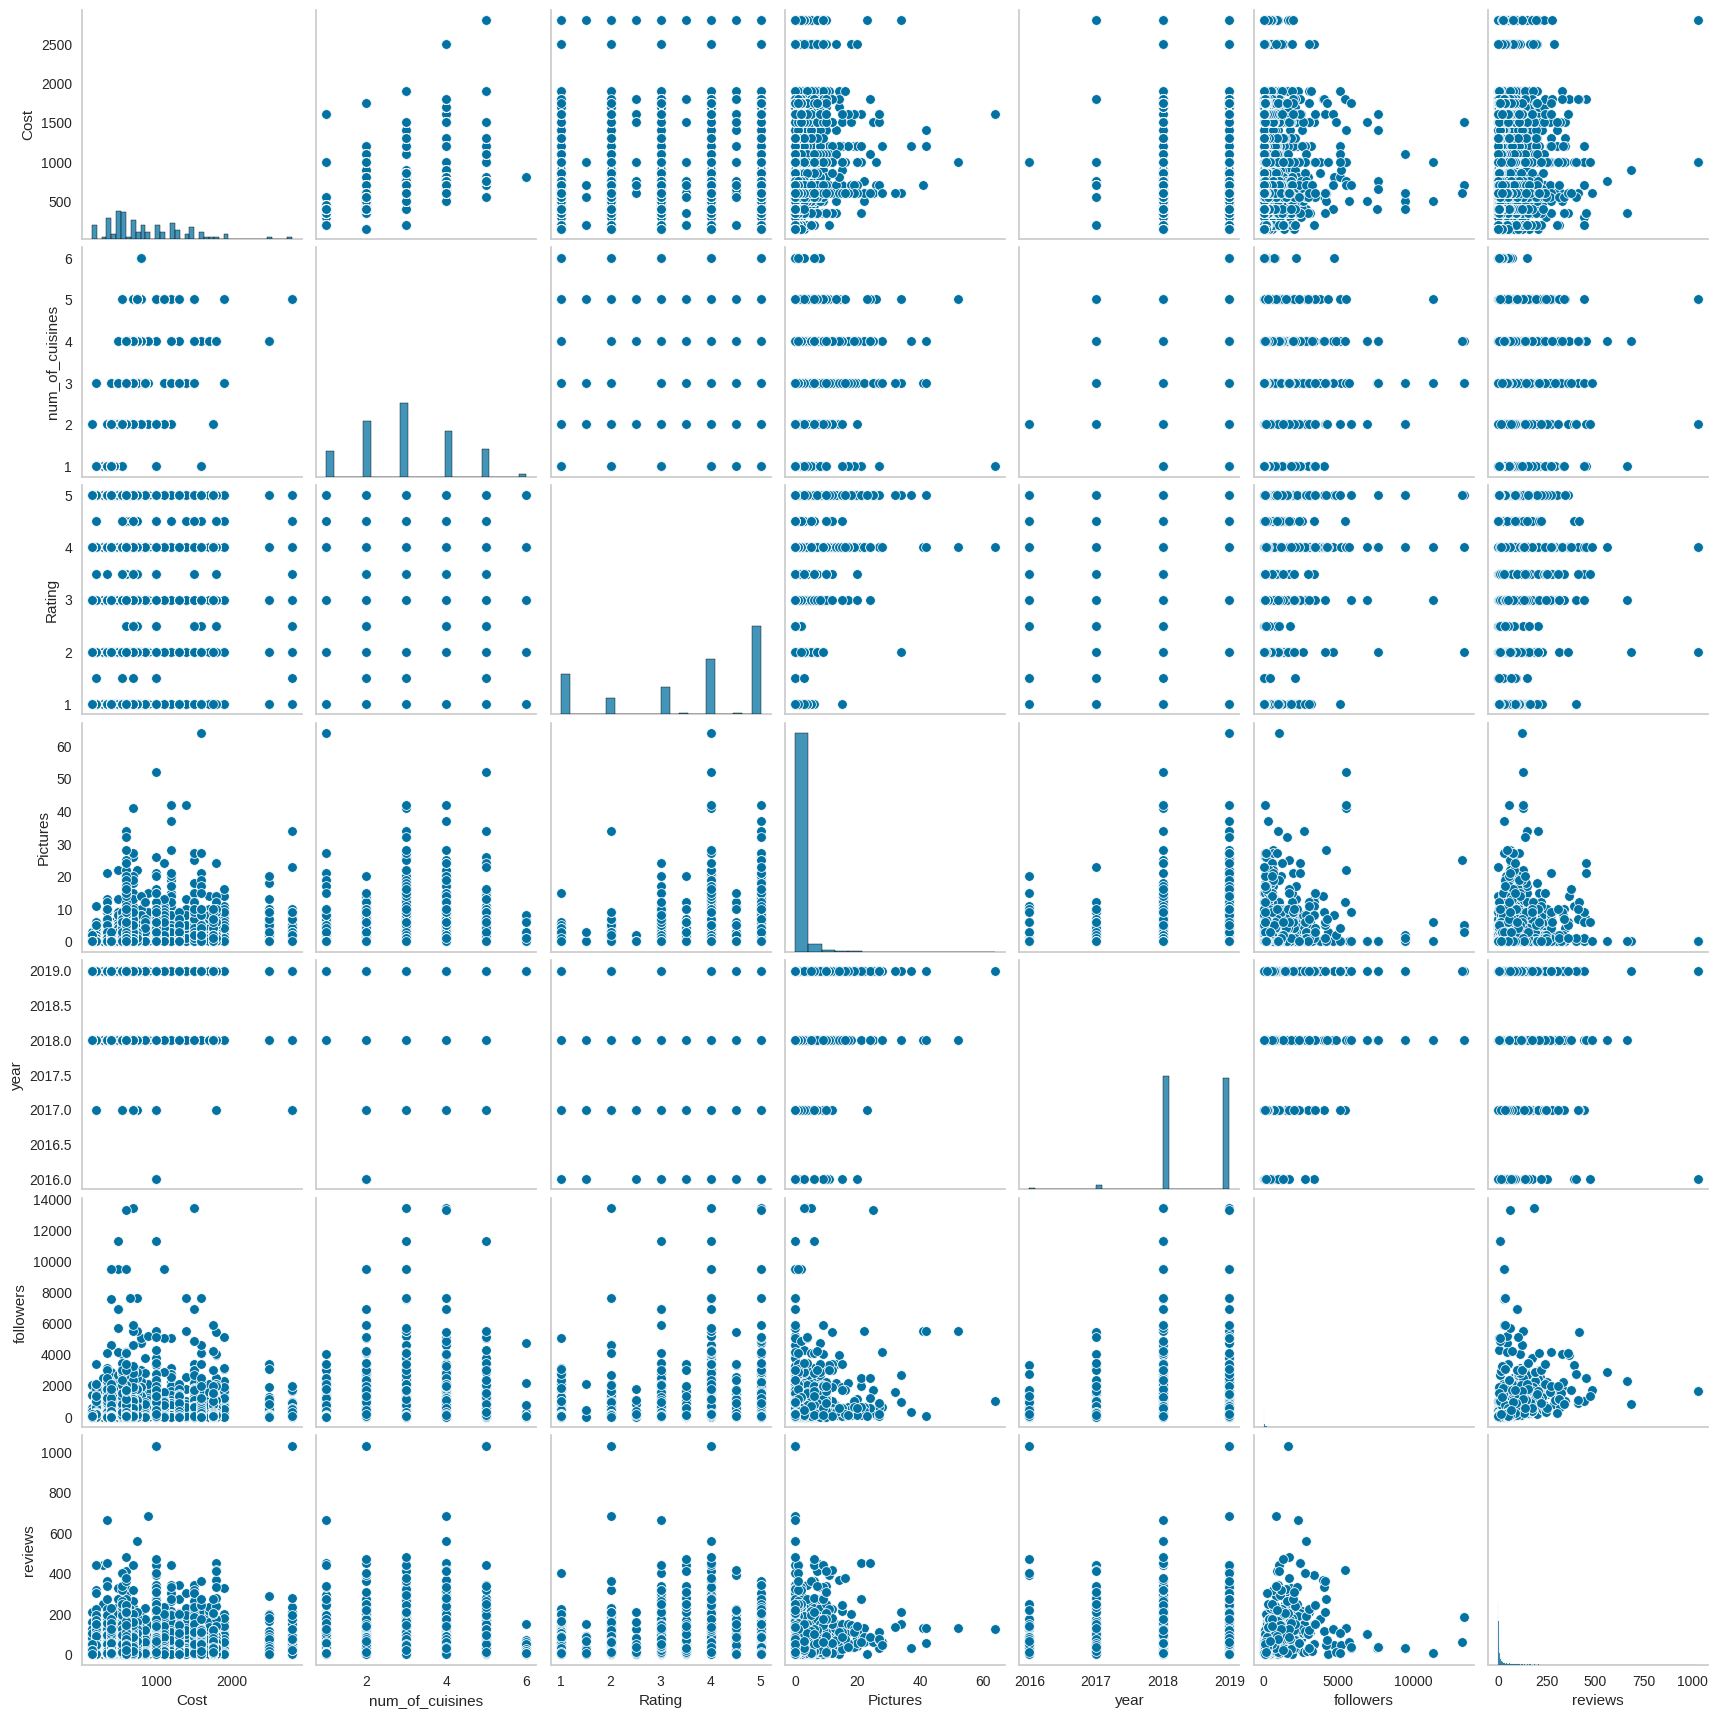

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged_df)
plt.show()

##### 1. Why did you pick the specific chart?

> A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and can be easily implemented in Python.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0(null hypothesis)**: There is no significant correlation in cost with respect to average Rating of the restaurant.

**H1(alternate hypothesis)**: There is significant correlation in cost with respect to average Rating of the restaurant.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Performing Pearson's Correlation test
stat, p = pearsonr(top_restaurants_by_rating['Cost'], top_restaurants_by_rating['Rating'])

#95% Confidence interval
if p < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

We are rejecting null hypothesis


Thus there is significant correlation between cost and Rating.

##### Which statistical test have you done to obtain P-Value?

Pearson's Correlation test

##### Why did you choose the specific statistical test?

Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0(null hypothesis)**: There is no significant correlation between number of reviews given and followers of the Reviewer.

**H1(alternate hypothesis)**: There is significant correlation between number of reviews given and followers of the Reviewer.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Performing non parametric mannwhitney test
stats, p_val=mannwhitneyu(Reviewer_count.followers,Reviewer_count.reviews)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 


We are rejecting null hypothesis


Thus there is significant correlation between number of reviews given and followers of the Reviewer.

##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test

##### Why did you choose the specific statistical test?

As the price range column is not normally distributed. So we cannot apply a parametric test thats why we have applied a non-parametric Mann-Whitney U test to find the p-value.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0(null hypothesis)**: There is no significant correlation in number of cuisines with respect to cost in the restaurant.

**H1(alternate hypothesis)**: There is significant correlation in number of cuisines with respect to cost in the restaurant

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Performing Pearson's Correlation test
stat, p = pearsonr(top_restaurants_by_rating['num_of_cuisines'], top_restaurants_by_rating['Cost'])

#95% Confidence interval
if p < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

We are rejecting null hypothesis


Thus there is significant correlation between cost and number of cuisines.

##### Which statistical test have you done to obtain P-Value?

Pearson's Correlation test

##### Why did you choose the specific statistical test?

Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables. It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
'''Missing Values already addressed in Data Wrangling section'''

'Missing Values already addressed in Data Wrangling section'

### 2. Handling Outliers

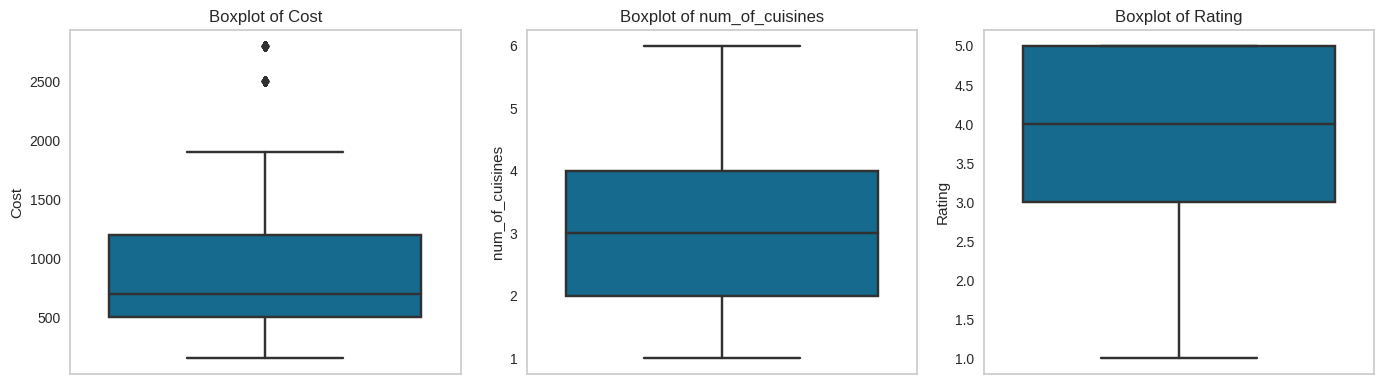

In [ ]:
# Handling Outliers & Outlier treatments
numerical_cols = ['Cost', 'num_of_cuisines', 'Rating']
rows=1 
cols=3
counter=1
fig = plt.figure(figsize=(14, 4))
for col in numerical_cols:
    plt.subplot(rows,cols,counter)
    sns.boxplot(y = col, data=merged_df)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    counter=counter+1
    plt.tight_layout()

In [ ]:
# Checking number of Outliers in cost
merged_df[merged_df['Cost'] > 2000]['Restaurant'].nunique()

2

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is presense of very few outliers in the numercal variables which can be ignored due to less observations in the dataset.

### 3. Categorical Encoding

In [ ]:
# Function for creating list from string
def convert_to_list(col):
  '''This function returns list of the values of the feature'''

  feature_list = rest_df[col].apply(lambda x: x.split(",")).to_list()

  feature_list = [[item.strip() for item in sublist] for sublist in feature_list]
  return feature_list

# Creating variable 'cuisines_list' from 'Cuisines'
rest_df['cuisines_list'] = convert_to_list('Cuisines')

In [ ]:
# Encode your categorical columns
dummy_variables = pd.get_dummies(rest_df['cuisines_list'].apply(pd.Series).stack()).sum(level=0)

# Concating encoded dummy variables with other variables
cluster_df = pd.concat([rest_df[['Name','Cost','num_of_cuisines']],dummy_variables],axis=1)

# Checking dataframe after encoding
cluster_df.head()

Name  Cost  num_of_cuisines  American  Andhra  \
0                 Beyond Flavours   800                6         0       0   
1                        Paradise   800                3         0       0   
2                        Flechazo  1300                4         0       0   
3  Shah Ghouse Hotel & Restaurant   800                5         0       0   
4      Over The Moon Brew Company  1200                5         0       0   

   Arabian  Asian  BBQ  Bakery  Beverages  ...  North Indian  Pizza  Salad  \
0        0      0    0       0          0  ...             1      0      0   
1        0      0    0       0          0  ...             1      0      0   
2        0      1    0       0          0  ...             1      0      0   
3        0      0    0       0          1  ...             1      0      0   
4        0      1    0       0          0  ...             1      0      0   

   Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0        0             1        0            0      0     0      0  
1        0             0        0            0      0     0      0  
2        0             0        0            0      0     0      0  
3        1             0        0            0      0     0      0  
4        0             0        0            0      0     0      0  

[5 rows x 47 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding is a common method for dealing with categorical data in machine learning. Categorical variables must be changed in the pre-processing section since machine learning models require numeric input variables.

### 4. Textual Data Preprocessing 

#### 1. Expand Contraction

In [ ]:
# Create a dataframe to perform sentiment analysis
sentiment_df = rev_df[['Restaurant','Reviewer','Review','Rating']]

# Applying function for contracting text
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Removing words and digits contain digits
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Downloading stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Remove Stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove White spaces
sentiment_df['Review'] = sentiment_df['Review'].str.strip()

#### 6. Tokenization

In [ ]:
# Tokenization
'''Not Needed'''

'Not Needed'

#### 7. Text Normalization

In [ ]:
# Assigning language parameter to stemmer
snow_stemmer = SnowballStemmer(language='english')

# Applying SnowballStemmer technique
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x : snow_stemmer.stem(x))

##### Which text normalization technique have you used and why?

> SnowballStemmer is a stemming technique used to extract the base form of the words by removing affixes from them.

#### 8. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfid_matrix = vectorizer.fit_transform(sentiment_df['Review'])

array = tfid_matrix.todense()

In [ ]:
# Checking shape after vectorization
df = pd.DataFrame(array)
df.shape

(9962, 18362)

##### Which text vectorization technique have you used and why?

> TF-IDF stands for term frequency and inverse document frequency. It is used to tokenize the documents learn the vocabulary and inverse the document frequency weightings, and allow to encode new documents.

> TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.


### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation &  Feature Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
'''Not Needed'''

'Not Needed'

### 6. Data Scaling

In [ ]:
# Creating copy of dataframe to perform scaling
scaled_df  = cluster_df.copy()
scaled_df.set_index('Name', inplace = True)

# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_df.iloc[:,1:3])

# Adding scaled values into original dataframe
scaled_df[['Cost','num_of_cuisines']] = scaled

##### Which method have you used to scale you data and why?

> StandardScaler is used to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1.

> StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, in order to standardize the range of functionality of the input dataset.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

> Dimensionality reduction brings many advantages to machine learning data like:

* It removes noise and redundant features, fewer features means less complexity
* Less storage space is needed because of fewer data
* Fewer features require less computation time
* Model accuracy improves due to less misleading data


In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components = 18)
X = pca.fit_transform(scaled_df)
print(pca.explained_variance_ratio_.cumsum())

[0.37165345 0.53574957 0.61292969 0.65514358 0.69029167 0.71845377
 0.7449237  0.76792374 0.78842238 0.8085581  0.82565796 0.84151541
 0.85567974 0.86838217 0.87970968 0.89047289 0.90046083 0.91011531]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

> Principal Component Analysis is a technique of feature extraction that maps a higher dimensional feature space to a lower-dimensional feature space. While reducing the number of dimensions, PCA ensures that maximum information of the original dataset is retained in the dataset with the reduced no. of dimensions and the co-relation between the newly obtained Principal Components is minimum.

## ***7. ML Model Implementation***

In [ ]:
#Dictionary for storing scores
score_dict = []

### ML Model - 1

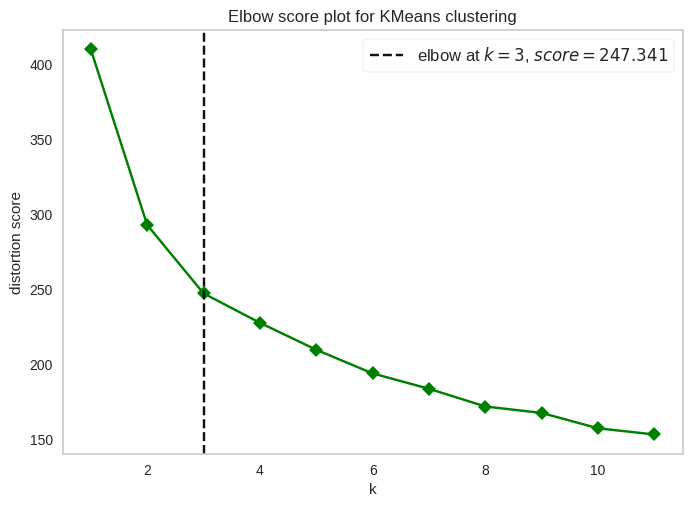

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), metric='distortion', timings=False, locate_elbow = True, title='Elbow score plot for KMeans clustering')

# Fit the data to the visualizer
visualizer.fit(X)        
visualizer.finalize()
elbow_line = visualizer.ax.lines[0]
elbow_line.set_color('green')

For n_clusters = 2 The average silhouette_score is : 0.2562484978388459
For n_clusters = 3 The average silhouette_score is : 0.21094714122208846
For n_clusters = 4 The average silhouette_score is : 0.15521597965182446
For n_clusters = 5 The average silhouette_score is : 0.1509014398455602
For n_clusters = 6 The average silhouette_score is : 0.1504997929647116
For n_clusters = 7 The average silhouette_score is : 0.16886523090249742
For n_clusters = 8 The average silhouette_score is : 0.1792054104544976
For n_clusters = 9 The average silhouette_score is : 0.17964096008041927
For n_clusters = 10 The average silhouette_score is : 0.17963137065532842
For n_clusters = 11 The average silhouette_score is : 0.15918514981555293


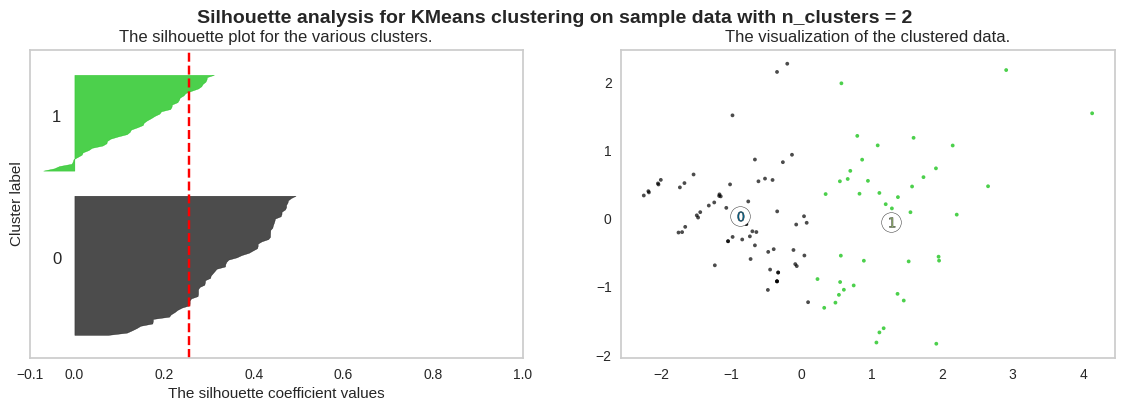

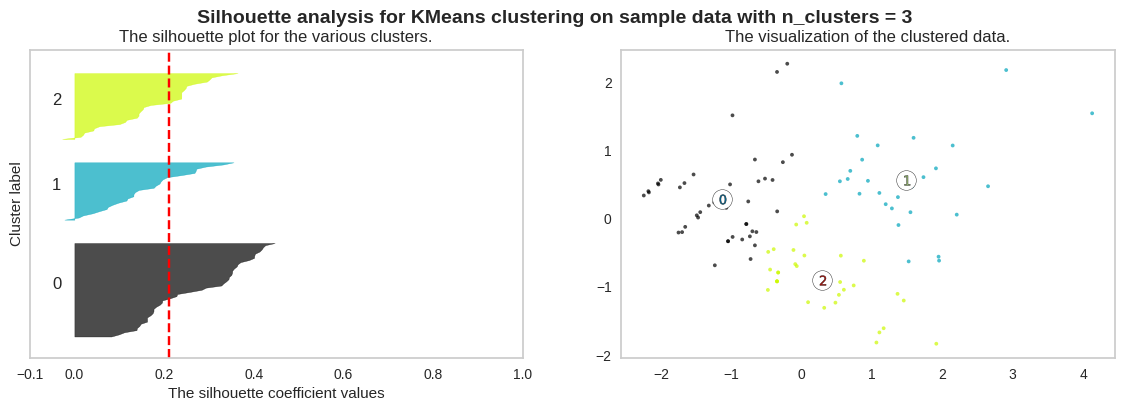

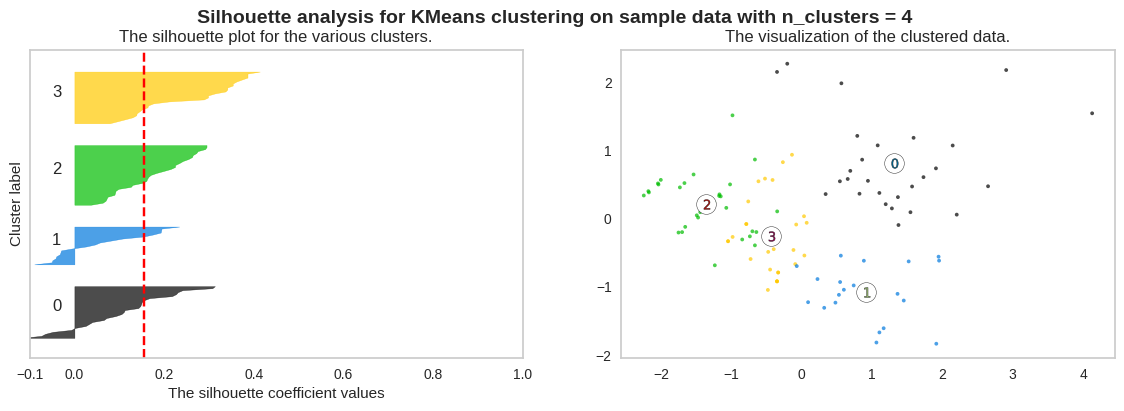

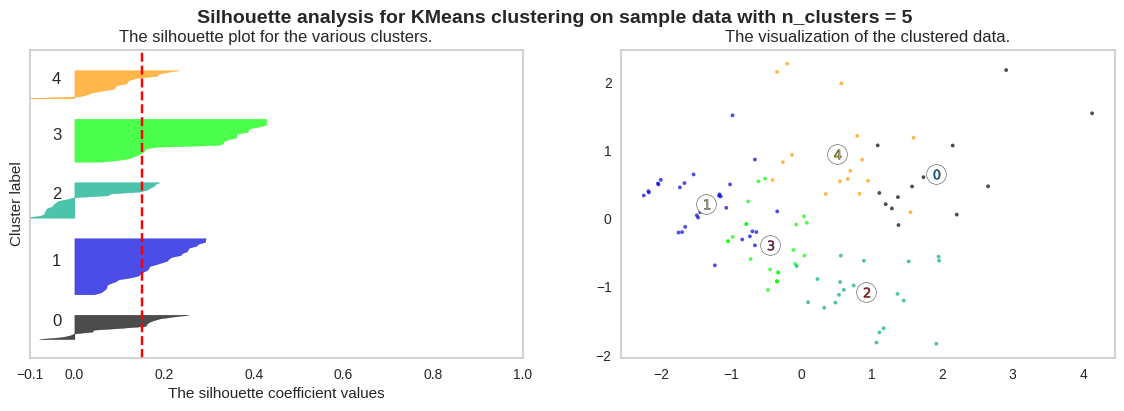

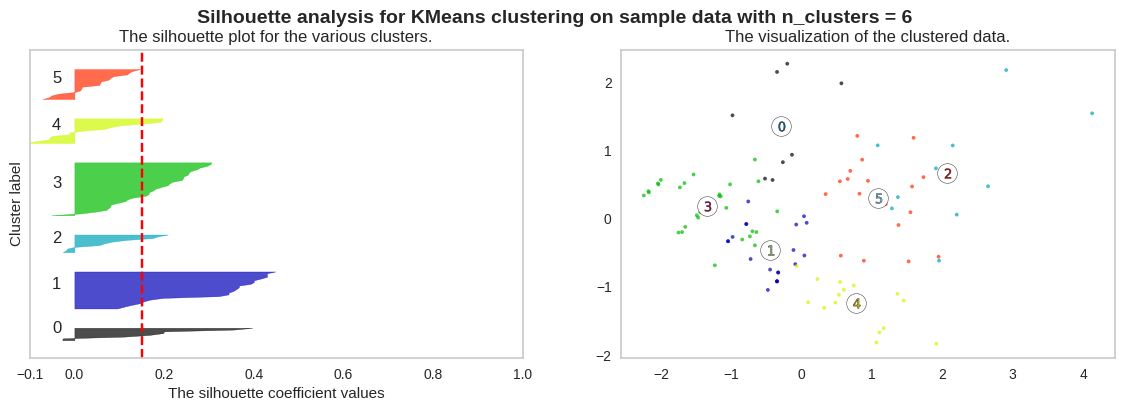

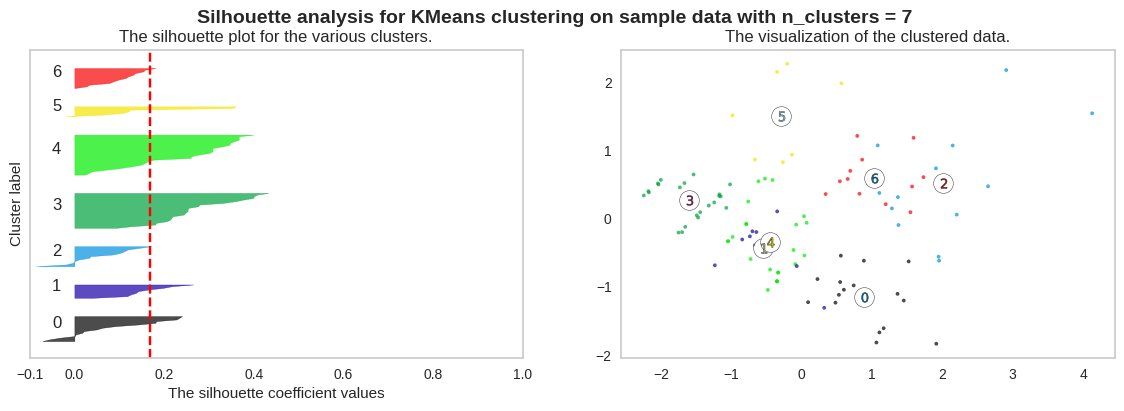

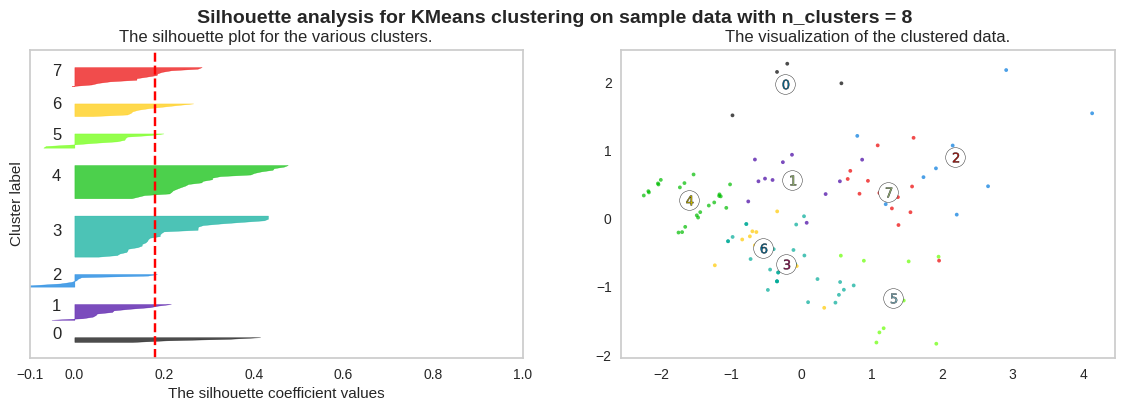

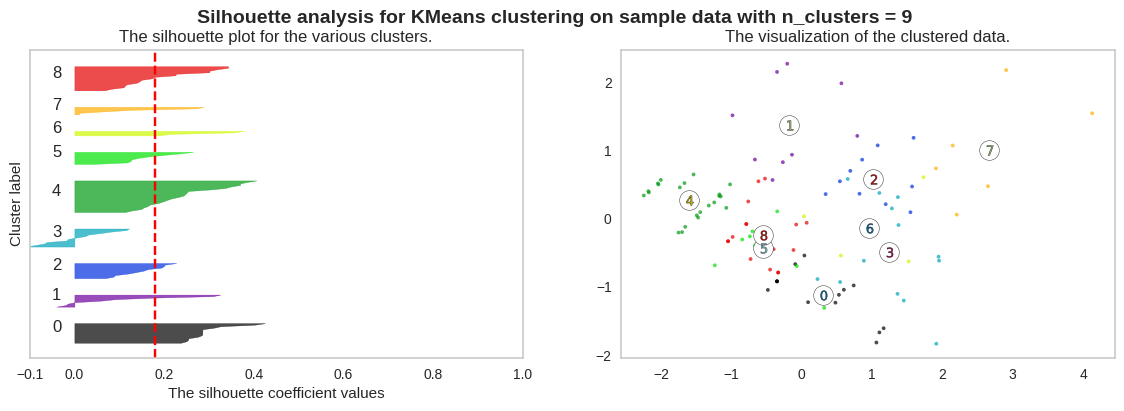

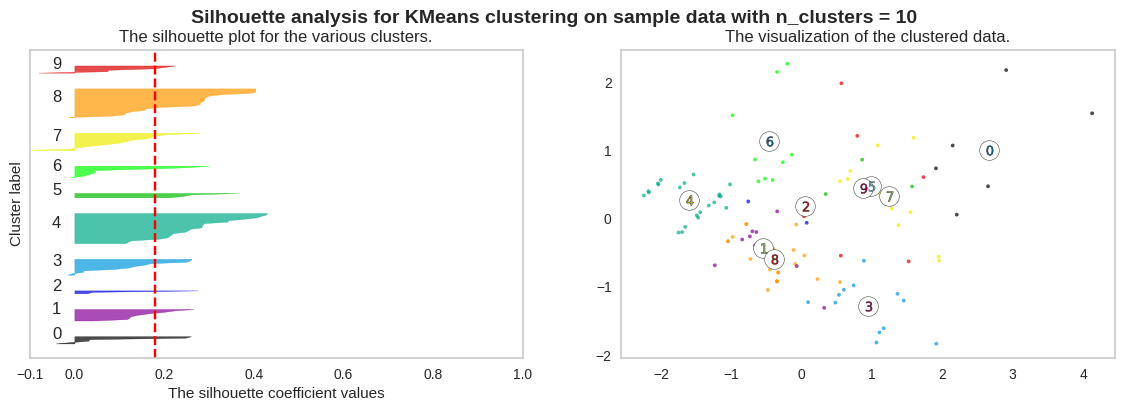

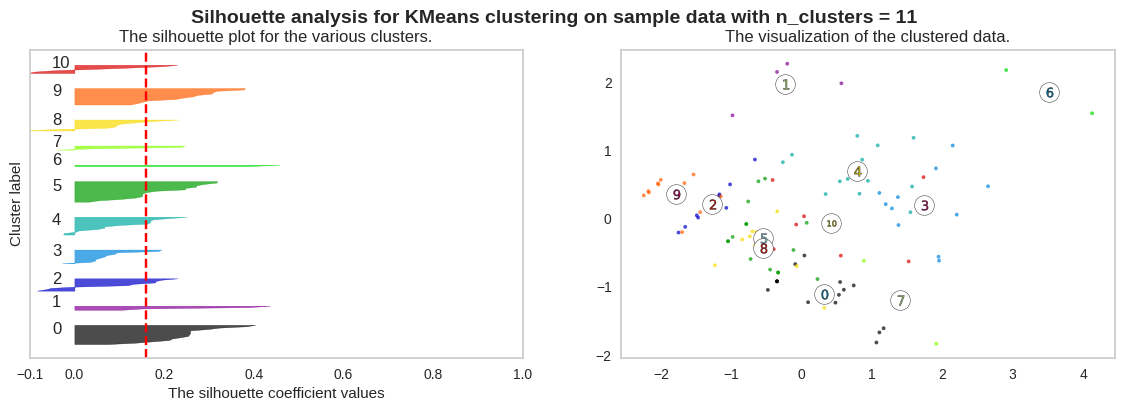

In [ ]:
# Applying Silhouette Method on X for finding the number of clusters.
import matplotlib.cm as cm
range_n_clusters = [2,3,4,5,6,7,8,9,10,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.grid(visible=False)

plt.show()

In [ ]:
# Define number of clusters
''' Through the application of elbow and sihoutte scores the optimal number of clusters 
for representing the underlying structure of the data has been determined to be 3.'''
clusters = 3

# Instantiate k-means object
km_model = KMeans(n_clusters = clusters)

# Fit the model to the data
km_model.fit(X)

# Get cluster labels for each data point
km_labels = km_model.labels_

# Get cluster centers
km_centers = km_model.cluster_centers_

# Output results
print('Cluster labels:\n', km_labels,'\n')
print('Cluster centers:\n', km_centers)

Cluster labels:
 [0 0 1 0 1 1 0 2 0 2 2 1 0 1 1 2 2 2 1 0 2 1 2 2 1 2 1 1 2 2 0 0 0 2 1 0 0
 0 1 2 1 2 2 2 0 0 1 0 0 0 2 0 0 1 2 2 1 2 2 2 1 1 0 0 2 1 0 2 1 1 1 1 2 2
 2 2 2 0 2 0 0 2 0 2 0 2 2 0 2 2 2 1 1 2 0 2 0 1 2 2 2 2 0 2 1] 

Cluster centers:
 [[ 2.90742124e-01 -8.97984847e-01 -1.70400395e-01  7.18534789e-02
   1.84616701e-03 -1.22732065e-02 -8.59485234e-05  5.55188490e-03
   1.16934458e-01  2.66027882e-02  1.98715279e-02  2.22649236e-02
   1.36705365e-02 -3.19230097e-02 -3.08112865e-02  5.90153082e-03
  -7.09185981e-03 -1.48570963e-02]
 [ 1.47952756e+00  5.64203990e-01  4.51120678e-02 -4.34713303e-02
   3.66074980e-03  4.77807515e-02 -1.41926275e-02 -5.74017717e-02
  -8.75120241e-02 -1.43912404e-02 -4.07947184e-02 -4.43942427e-02
  -2.50128186e-02  5.10780590e-02 -3.30825708e-04 -2.26283391e-02
   5.19283228e-03 -1.74518512e-02]
 [-1.12734488e+00  2.87506741e-01  9.31038833e-02 -2.40469795e-02
  -3.59062974e-03 -2.10026319e-02  8.89208718e-03  3.17686509e-02
  -2.87014665e-02 -

In [ ]:
def plot_clusters_3d(X, centers, labels):
    """
    Plots clusters with centers.

    Parameters:
    -----------
    X : numpy array
        Data points to be plotted.
    centers : numpy array
        Cluster centers to be plotted.
    labels : numpy array
        Cluster labels for data points.

    Returns:
    -------- 
    3D scatter plot of the data points and cluster centers.
    """
      # Create Plotly figure object
    fig = go.Figure()

    # Data points
    fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode='markers',
        marker=dict(color=labels,colorscale='Rainbow',opacity=0.6,size=5),
        name='Data Points'))

    # Cluster centers
    fig.add_trace(go.Scatter3d(x=centers[:, 0], y=centers[:, 1], z=centers[:, 2],mode='markers',
        marker=dict(color=['black'],size=6,symbol='diamond'),
        name='Cluster Centers'))

    # Set axis labels and title
    fig.update_layout(scene=dict(xaxis_title='X',yaxis_title='Y',zaxis_title='Z',
            aspectratio=dict(x=1, y=1, z=0.7),camera=dict(up=dict(x=0, y=0, z=1),eye=dict(x=1.5, y=-1.5, z=1))),
        title='Clusters of Restaurant by K-Means Clustering')
    
    fig.update_traces(hovertemplate = list(zip(rest_df["Name"], rest_df["Cuisines"])))

    return fig

In [ ]:
# Plotting a 3D plot 
plot_clusters_3d(X, km_centers, km_labels)

In [ ]:
# Creating a dataframe for getting the number of cuisine for each cluster
def Top_Cuisines(labels):
    cluster_cusines_df = rest_df[["Name","Cuisines"]]

    cluster_cusines_df["cluster_label"] = labels

    for i in list(cluster_cusines_df["cluster_label"].unique()):
      top_cusines = count_items(cluster_cusines_df[cluster_cusines_df['cluster_label']== i]["Cuisines"]).rename(columns = {'index':'cuisine',0:'count'}).sort_values(by = 'count',ascending = False,ignore_index = True).head(7)
      print(f"\nTop cuisines for cluster label {i}:\n {top_cusines}")

In [ ]:
# Famous cuisines in each cluster
Top_Cuisines(km_labels)


Top cuisines for cluster label 0:
         cuisine  count
0       Chinese     26
1  North Indian     26
2       Biryani     14
3  South Indian      7
4        Andhra      5
5         Kebab      4
6   Continental      4

Top cuisines for cluster label 1:
          cuisine  count
0   North Indian     21
1    Continental     13
2        Italian     13
3          Asian     12
4        Chinese     11
5  Mediterranean      5
6          Sushi      4

Top cuisines for cluster label 2:
         cuisine  count
0  North Indian     14
1     Fast Food     12
2      Desserts     11
3        Bakery      6
4       Chinese      6
5          Cafe      5
6   Continental      4


In [ ]:
#Adding scores to the model dictionary
score_dict.append(['K means Clustering (Elbow Method)', 3, 'Silhouette score' ,0.2109471])
score_dict.append(['K means Clustering (Silhouette Method)', 2, 'Silhouette score' ,0.2562485])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
pd.DataFrame(score_dict,columns = ['Model Name','Optimal clusters','Evaluation Metric','Metric Score'])

Model Name  Optimal clusters Evaluation Metric  \
0       K means Clustering (Elbow Method)                 3  Silhouette score   
1  K means Clustering (Silhouette Method)                 2  Silhouette score   

   Metric Score  
0      0.210947  
1      0.256248

### ML Model - 2

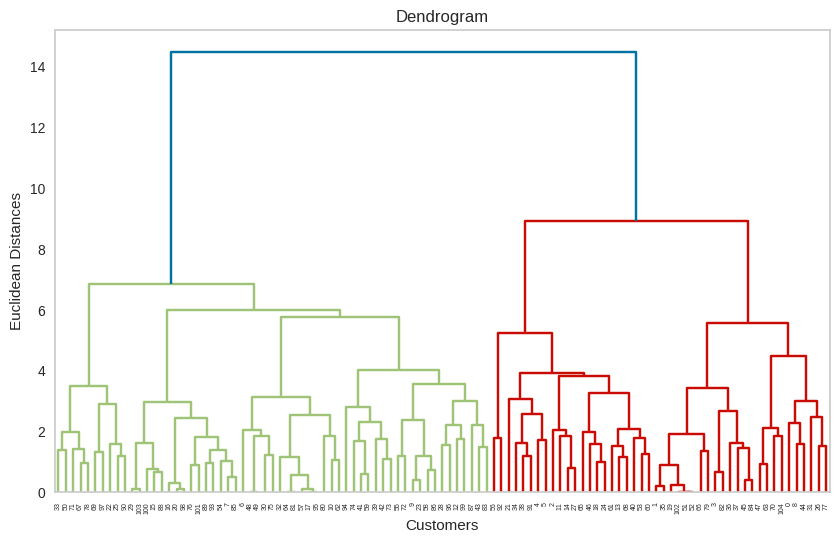

In [ ]:
# create the dendrogram using ward linkage method
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# set the title and labels for the plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.grid(visible=False)
# show the dendrogram
plt.show()

In [ ]:
# Fitting hierarchical clustering to X

# Define number of clusters
c = 2

# Perform Agglomerative clustering
h_model = AgglomerativeClustering(n_clusters = c, affinity = 'euclidean', linkage = 'ward')

# Get cluster labels for each data point
h_labels = h_model.fit_predict(X)

In [ ]:
# ploting Clusters for Restaurant by Agglomerative Clustering 
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode='markers',
        marker=dict(color= h_labels, colorscale='Rainbow', opacity=0.7, size=6),name='Data Points'))

fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
        aspectratio=dict(x=1, y=1, z=0.7), camera=dict(up=dict(x=0, y=0, z=1),eye=dict(x=1.5, y=-1.5, z=1))),
        title='Clusters of Restaurant by Agglomerative Clustering')

fig.update_traces(hovertemplate = list(zip(rest_df["Name"], rest_df["Cuisines"])))

In [ ]:
# ploting silhouette_score evaluate the model range (2,8).
for c in range(2, 8):
    acmodel = AgglomerativeClustering(n_clusters = c, affinity = 'euclidean', linkage = 'ward')
    aclabels = acmodel.fit_predict(X)
    silhouette = silhouette_score(X, aclabels)
    print("For n_clusters =", c, ", the silhouette_score is :", silhouette)

For n_clusters = 2 , the silhouette_score is : 0.22181179888568986
For n_clusters = 3 , the silhouette_score is : 0.19890292976801646
For n_clusters = 4 , the silhouette_score is : 0.1571298762149491
For n_clusters = 5 , the silhouette_score is : 0.12188492439064227
For n_clusters = 6 , the silhouette_score is : 0.12913042564527671
For n_clusters = 7 , the silhouette_score is : 0.1477833393923881


In [ ]:
# Getting top cuisines for Agglomerative Clustering
Top_Cuisines(h_labels)


Top cuisines for cluster label 0:
         cuisine  count
0  North Indian     39
1       Chinese     31
2   Continental     15
3       Biryani     14
4       Italian     14
5         Asian     12
6        Andhra      5

Top cuisines for cluster label 1:
         cuisine  count
0  North Indian     22
1     Fast Food     15
2      Desserts     12
3       Chinese     12
4          Cafe      6
5   Continental      6
6        Bakery      6


In [ ]:
#Adding scores to the model dictionary
score_dict.append(['Agglomerative Clustering', 2, 'Silhouette score' ,0.2218117])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
Metric_Score_df = pd.DataFrame(score_dict,columns = ['Model Name','Optimal clusters','Evaluation Metric','Metric Score'])
Metric_Score_df

Model Name  Optimal clusters Evaluation Metric  \
0       K means Clustering (Elbow Method)                 3  Silhouette score   
1  K means Clustering (Silhouette Method)                 2  Silhouette score   
2                Agglomerative Clustering                 2  Silhouette score   

   Metric Score  
0      0.210947  
1      0.256248  
2      0.221812

#### 2. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

> K means Clustering with	2	clusters will give the best results.	

## **Sentiment Analysis**

### ML Model - 3

In [ ]:
# Downloading package vader_lexicon
nltk.download('vader_lexicon')

# Creating instance of NLTK SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Function to get the sentiment score for each review
def get_polarity_score(review):

    '''Gives polarity score by taking review as input'''

    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(review)
    return scores['compound']

# Function for classifying sentiment on the basis of sentiment_score
def sentiment_check(sentiment_score):

  '''classifies Sentiment into Positive, Neutral & Negative category'''
  
  if(sentiment_score > 0.4):
    return "Positive"
  elif(0 < sentiment_score < 0.4):
    return 'Neutral'
  else:
    return 'Negative'

In [ ]:
# Creating variable 'sentiment_score'
sentiment_df['sentiment_score'] = sentiment_df['Review'].apply(lambda x : get_polarity_score(x))

# Classifying variable 'sentiment'
sentiment_df['sentiment'] = sentiment_df["sentiment_score"].apply(lambda x : sentiment_check(x))

# Checking head after classification
sentiment_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  sentiment_score  \
0  ambience good food quite good saturday lunch c...     5.0           0.9660   
1  ambience good pleasant evening service prompt ...     5.0           0.9360   
2  must try great food great ambience thnx servic...     5.0           0.8481   
3  soumen das arun great guy behavior sincerety g...     5.0           0.8591   
4  food goodwe ordered kodi drumsticks basket mut...     5.0           0.9201   

  sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

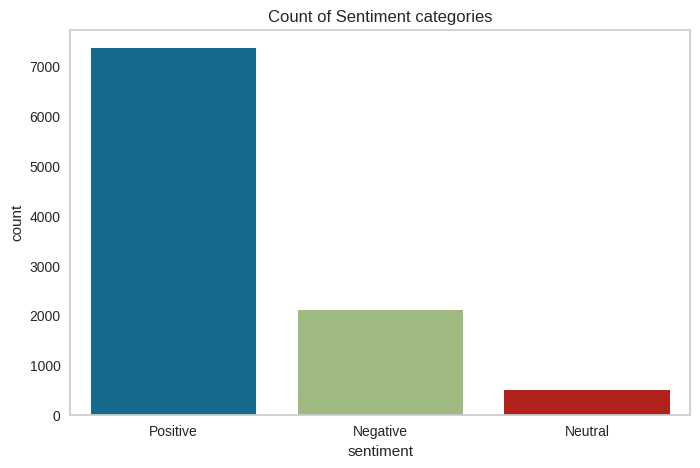

In [ ]:
# Count of Sentiment categories
plt.figure(figsize=(8,5))
sns.countplot(data=sentiment_df, x='sentiment')
plt.title('Count of Sentiment categories')
plt.show()

In [ ]:
# Function for plotting frequency of words
def plot_top_words(sentiment,limit):
    ''' Gives Most frequent words in Different sentiment type'''
    vectorizer.fit(sentiment_df[sentiment_df['sentiment'] == sentiment]['Review'])

    dictionary = vectorizer.vocabulary_.items()

    # lists to store the vocab and counts
    vocab = []
    count = []
    # iterate through each vocab and count append the value to designated lists
    for key, value in dictionary:
        vocab.append(key)
        count.append(value)

    # store the count in panadas dataframe with vocab as index
    vocab = pd.Series(count, index=vocab)

    # sort the dataframe
    vocab = vocab.sort_values(ascending=True)

    # plot of the top vocab
    top_vacab = vocab.tail(20)
    top_vacab.plot(kind = 'barh', figsize=(5,10),xlim= limit)
    plt.title('Most frequent words for '+ sentiment + ' sentiment')

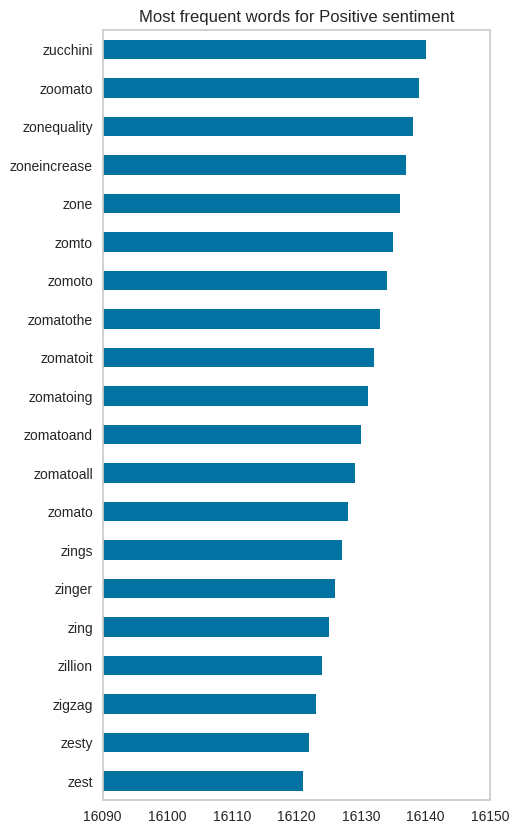

In [ ]:
# Most frequent words for Positive sentiment
plot_top_words(sentiment = 'Positive' ,limit = (16090, 16150))

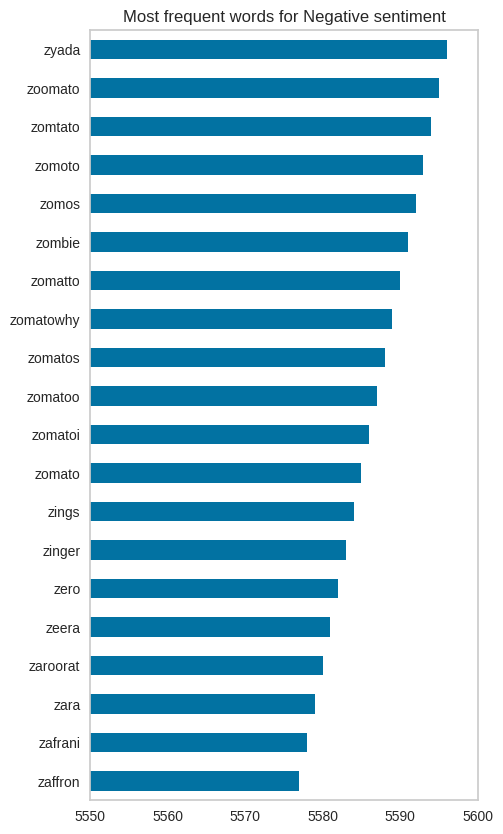

In [ ]:
# Most frequent words for Negative sentiment
plot_top_words(sentiment = 'Negative' ,limit = (5550, 5600))

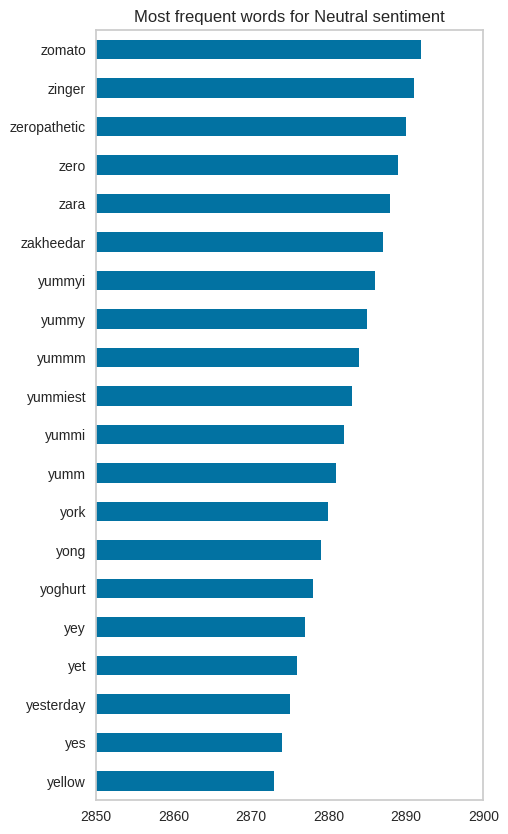

In [ ]:
# Most frequent words for Neutral sentiment
plot_top_words(sentiment = 'Neutral' ,limit = (2850, 2900))

In [ ]:
# ML Model - 3 LDA

def LDA(sentiment):

  ''' Performs LDA Modeling & Visualization by taking Sentiment type as input ''' 

  #Function to change sentence into words
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence)))

  data = sentiment_df[sentiment_df['sentiment'] == sentiment]['Review'].values.tolist()
  data_words = list(sent_to_words(data))

  # Create Dictionary
  id2word = corpora.Dictionary(data_words)
  # Create Corpus
  texts = data_words
  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]


  # number of topics
  num_topics = 2
  num_words = 50

  # Build LDA model
  lda_model = gensim.models.LdaModel(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)


  # Get the topics and their word distributions
  topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)

  # Print the most important words for each topic
  emp_list = []
  for topic_num, words in topics:
      emp_list.append([(word, prob) for word, prob in words])
  
  # Dataframe of important words
  df_lda = pd.DataFrame(emp_list[0]).merge(pd.DataFrame(emp_list[1]),how='outer',on = 0).rename(columns = {0:'Words'}).fillna(0)
  df_lda['Importance'] = df_lda['1_x'] + df_lda['1_y']
  df_lda = df_lda[['Words','Importance']]

  # pyLDAvis
  LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

  return LDAvis_prepared,df_lda

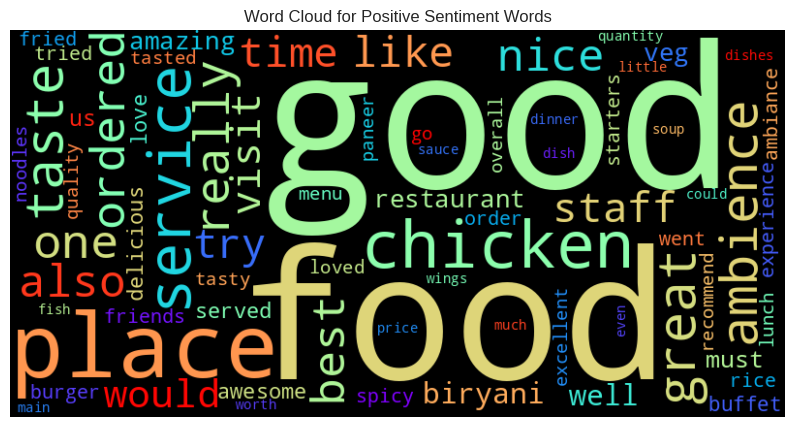

In [ ]:
# LDAvis for Positive Sentiment
LDAvis_Positive,Positive_words = LDA(sentiment='Positive')

# Word Cloud for Positive Sentiment Words
draw_word_cloud(Positive_words,'Word Cloud for Positive Sentiment Words')

In [ ]:
# LDAvis for Positive Sentiment
LDAvis_Positive

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.038365  0.0       1        1  50.371659
0     -0.038365  0.0       2        1  49.628341, topic_info=         Term         Freq        Total Category  logprob  loglift
570   chicken  2608.000000  2608.000000  Default  30.0000  30.0000
28    service  2138.000000  2138.000000  Default  29.0000  29.0000
8        food  4916.000000  4916.000000  Default  28.0000  28.0000
10       good  6107.000000  6107.000000  Default  27.0000  27.0000
5320   burger   404.000000   404.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
28    service   499.342536  2138.351785   Topic2  -5.4014  -0.7539
17     really   434.805003  1444.344754   Topic2  -5.5398  -0.4999
74       nice   393.277649  1246.127560   Topic2  -5.6402  -0.4527
34       must   348.085858   777.415059   Topic2  -5.7623  -0.1029
221      time   357.758510  1085.957882   Topic2  -5.7348  -0.4098

[205 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
14810      1  0.969374   alisha
14810      2  0.121172   alisha
974        1  0.062308  alright
974        2  0.934626  alright
0          1  0.621102     also
...      ...       ...      ...
414        2  0.329831     went
1290       1  0.251379    wings
1290       2  0.748673    wings
51         1  0.469955    would
51         2  0.529994    would

[305 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

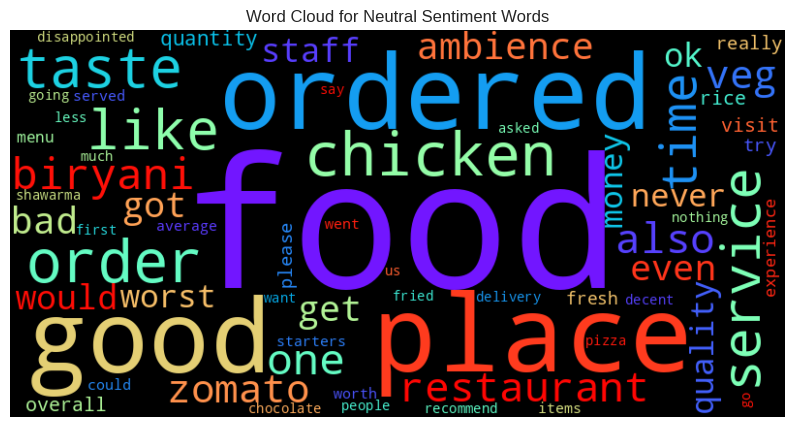

In [ ]:
# # LDAvis for Neutral Sentiment
LDAvis_Neutral,Neutral_words = LDA(sentiment='Neutral')

# Word Cloud for Neutral Sentiment Words
draw_word_cloud(Neutral_words,'Word Cloud for Neutral Sentiment Words')

In [ ]:
# LDAvis for Neutral Sentiment
LDAvis_Neutral

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.020066  0.0       1        1  56.105625
0     -0.020066  0.0       2        1  43.894375, topic_info=           Term        Freq       Total Category  logprob  loglift
277       taste   67.000000   67.000000  Default  30.0000  30.0000
186         one   57.000000   57.000000  Default  29.0000  29.0000
97         also   47.000000   47.000000  Default  28.0000  28.0000
44         food  186.000000  186.000000  Default  27.0000  27.0000
103       going   12.000000   12.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
32     ambience   14.170494   37.631796   Topic2  -5.7610  -0.1533
68      service   16.900849   69.673080   Topic2  -5.5848  -0.5931
27          try   11.448586   23.329034   Topic2  -5.9743   0.1116
19   restaurant   13.607710   52.189373   Topic2  -5.8015  -0.5209
9           get   12.330585   36.162500   Topic2  -5.9001  -0.2526

[186 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1023      1  0.437079      al
1023      2  0.874157      al
545       1  0.218251    aloo
545       2  0.654754    aloo
97        1  0.417760    also
...     ...       ...     ...
198       2  0.583979   worth
497       1  0.501767   would
497       2  0.501767   would
76        1  0.537174  zomato
76        2  0.467108  zomato

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

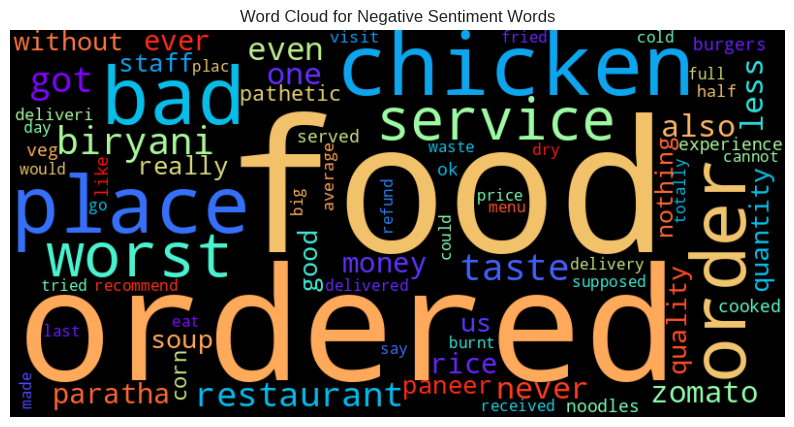

In [ ]:
# # LDAvis for Negative Sentiment
LDAvis_Negative,Negative_words = LDA(sentiment='Negative')

# Word Cloud for Negative Sentiment Words
draw_word_cloud(Negative_words,'Word Cloud for Negative Sentiment Words')

In [ ]:
# LDAvis for Negative Sentiment
LDAvis_Negative

PreparedData(topic_coordinates=            x    y  topics  cluster       Freq
topic                                         
1      0.0443  0.0       1        1  55.999884
0     -0.0443  0.0       2        1  44.000116, topic_info=            Term        Freq       Total Category  logprob  loglift
412         rice  154.000000  154.000000  Default  30.0000  30.0000
280     deliveri   59.000000   59.000000  Default  29.0000  29.0000
26          food  847.000000  847.000000  Default  28.0000  28.0000
4988     burgers   86.000000   86.000000  Default  27.0000  27.0000
135      biryani  254.000000  254.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
9          never   63.975569  181.160615   Topic2  -5.4930  -0.2199
59         worst   68.319772  300.464572   Topic2  -5.4273  -0.6602
709     quantity   51.481611  116.741097   Topic2  -5.7102   0.0022
48    restaurant   57.062188  244.705927   Topic2  -5.6073  -0.6349
124           us   50.573618  111.971653   Topic2  -5.7280   0.0262

[181 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
18        1  0.399688       also
18        2  0.596636       also
4356      1  0.063329      alway
4356      2  0.949928      alway
2636      1  0.064682  answering
...     ...       ...        ...
59        2  0.226316      worst
939       1  0.060882      yummi
939       2  0.974116      yummi
307       1  0.402892     zomato
307       2  0.591748     zomato

[270 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
# Printing Evaluation metrics dataframe
Metric_Score_df

Model Name  Optimal clusters Evaluation Metric  \
0       K means Clustering (Elbow Method)                 3  Silhouette score   
1  K means Clustering (Silhouette Method)                 2  Silhouette score   
2                Agglomerative Clustering                 2  Silhouette score   

   Metric Score  
0      0.210947  
1      0.256248  
2      0.221812

> Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

* 1: Means clusters are well apart from each other and clearly distinguished.

* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

* -1: Means clusters are assigned in the wrong way.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

> For Clustering - K-Means clustering with 2 clusters.

> For Sentiment Analysis - VADER using Sentiment Intensity Analyzer to get polarity scores, with those scores we classified sentiments into Positive, Negative & Neutral.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

> K-Means clustering:

* K-Means Clustering is an Unsupervised Learning algorithm, which allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

* The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

* The k-means clustering algorithm mainly performs two tasks:

  1) Determines the best value for K center points or centroids by an iterative process.

  2) Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

> VADER:

* VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

* VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
filename = 'Restaurant names and Metadata.sav'
pickle.dump(km_model, open(filename, 'wb'))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

> Conclusions from EDA :

* Restaurant Types: The majority of restaurants (38.1%) fall under the mid-scale category, followed by affordable restaurants (31.4%). This indicates that customers have a preference for restaurants that offer moderate pricing options.

* Collection: The word cloud visualization helps identify popular terms or trends within the reviews. The tagline "Great Buffets" stands out as the most famous collection, suggesting that buffet-style dining is highly regarded among customers.

* Price Range: The minimum restaurant price is 150, offered by Amul & Mohammedia Shawarma, while the maximum price is 2800, offered by Collage - Hyatt Hyderabad Gachibowli. This indicates a wide range of pricing options available to customers.

* Ratings: Reviewers predominantly give ratings of 5 and 4, indicating positive sentiments towards the restaurants. This suggests that customers generally have a satisfactory dining experience.

* Reviewers: Satwinder Singh has the highest number of followers among all reviewers, while Anvesh Chowdary has posted the maximum number of reviews. These insights can be useful for identifying influential reviewers and understanding their impact on the restaurant industry.

* High-Priced Restaurants: High-priced restaurants tend to receive higher ratings, indicating that customers expect a better dining experience when paying more.

* Top Rated Restaurants: The top-rated restaurants primarily fall under the up-scale and fine dining categories. This suggests that customers highly value quality and sophistication in their dining experiences.

* Review Trends: Reviews are predominantly posted on weekends, indicating that customers are more likely to dine out or order food during this time. There is also a significant increase in the number of reviews posted year on year, indicating a growing interest in the restaurant industry.

* Pictures and Ratings: Restaurants with the highest number of pictures posted tend to have average ratings below 4. This suggests that customers may have higher expectations based on visual representations but are less satisfied with the overall dining experience.

* Correlations: The number of cuisines and cost are positively correlated, indicating that restaurants offering a greater variety of cuisines tend to have higher prices. The number of reviews posted and followers, as well as the number of reviews and pictures posted, are also positively correlated, suggesting that popular restaurants attract more attention and engagement.

* Restaurants with Zero Reviews: Five restaurants, namely 'Wich Please', 'Angaara Counts 3', 'IndiBlaze', 'Republic Of Noodles - Lemon Tree Hotel', and 'Sweet Basket', have zero reviews. This could indicate that these restaurants are relatively new or less popular among reviewers.

> ML Model selected for clustering: K-Means Clustering

* K-means clustering can assist in decision-making by providing a structured way to understand and analyze complex datasets. The identified clusters can guide decisions related to resource allocation, target audience selection, or tailoring strategies based on the characteristics of each cluster.

* K-means clustering is designed to handle large datasets efficiently. By assigning data points to the nearest centroid, the amount of computation required is reduced.

* K-means clustering produces results that are straightforward to interpret, making it a useful method for communicating data clustering results to non-technical stakeholders.

> ML Model selected for sentiment analysis: VADER (Valence Aware Dictionary for Sentiment Reasoning)

* VADER is known for its simplicity and effectiveness in analyzing sentiment in short and informal texts, such as social media posts and customer reviews. It performs well in capturing sentiment intensity, handling negations, and understanding sentiment in context.

* VADER relies on a pre-built sentiment lexicon that contains a vast collection of words and their associated sentiment scores. Each word is assigned a polarity score, indicating whether it conveys positive or negative sentiment. The scores are further adjusted using heuristics and rules.


* Limitations: While VADER is a useful tool, it has certain limitations. It struggles with sarcasm, irony, and other forms of figurative language that require a deeper understanding of context. Additionally, VADER may not perform as well with longer and more complex texts, where the context and structure play a significant role in sentiment interpretation.

##**Suggestions :**

* Identify the specific areas where customers expressed dissatisfaction, as indicated by the negative sentiment reviews. Prioritize efforts to address these issues and enhance the service in those areas. This could involve improving food quality, delivery efficiency, customer service, or any other aspects that contribute to negative experiences.

* Pay attention to the positive sentiment reviews, as they represent satisfied customers. Identify the key factors contributing to positive experiences and find ways to further enhance and promote them. This could involve recognizing and rewarding exceptional service, improving menu options, or providing personalized recommendations based on customer preferences.

* Consider incorporating additional features such as images and menus of the restaurants into the analysis. This can provide a richer context and deeper insights into customer preferences and expectations. Analyzing visual content, for example, can help identify the visual appeal of dishes and how it relates to customer satisfaction.

* Identify influential reviewers, such as Satwinder Singh, who has the highest number of followers, and engage with them to strengthen customer relationships. Encourage customers to provide feedback, suggestions, and recommendations. Actively address customer concerns and respond to their feedback promptly, showing a commitment to improving the overall experience.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***